## $\underline{\textbf{Importing Necessary Libraries & Setting Figure Paramters}}$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
%matplotlib inline

# $\underline{\textbf{Problem }} \textit{- Smoothing through Convolution}$

### $\textbf{1. } \text{Creating a 3d grid of size - } 64\times64\times64$

In [30]:
#Creating a grid of size 64 X 64 X 64
size = 64

x_vals = np.linspace(-10,10,size,endpoint=True)
y_vals = np.linspace(-10,10,size,endpoint=True)
z_vals = np.linspace(-10,10,size,endpoint=True)

X_mesh, Y_mesh, Z_mesh = np.meshgrid(x_vals,y_vals,z_vals)

### $\textbf{2. } \text{Generating a Gaussian Random Field and plotting it}$

In [68]:
#Generating gaussian random field
mean, sigma = 0,1

gaussian_field = np.random.normal(mean,sigma,(len(x_vals),len(y_vals),len(z_vals)))

z_min, z_max = -np.abs(gaussian_field).max(), np.abs(gaussian_field).max()

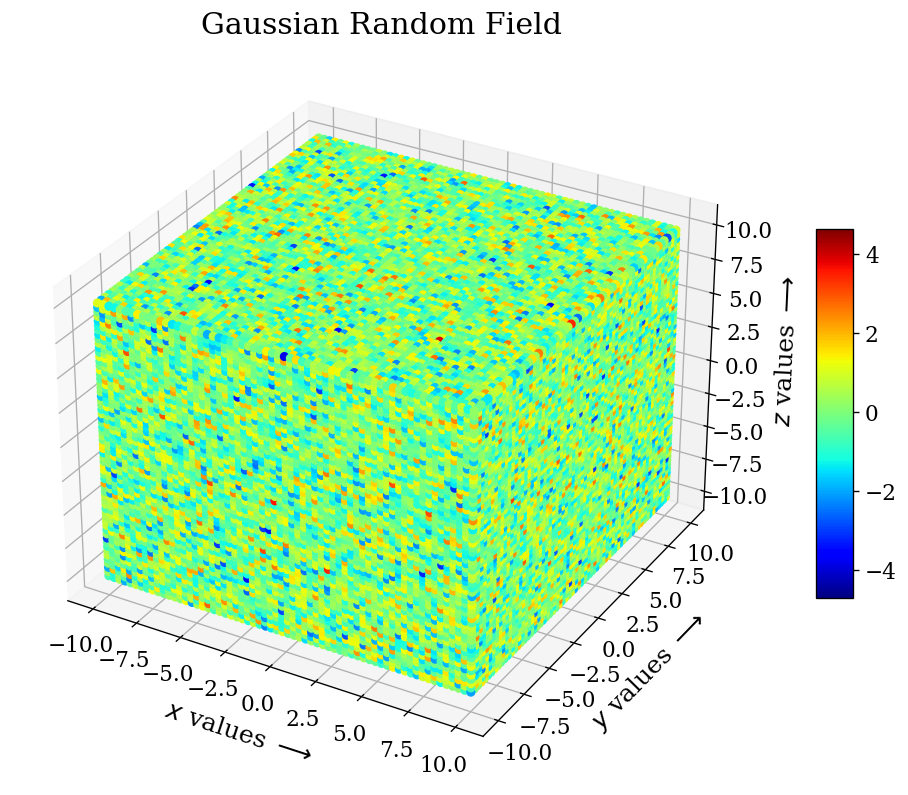

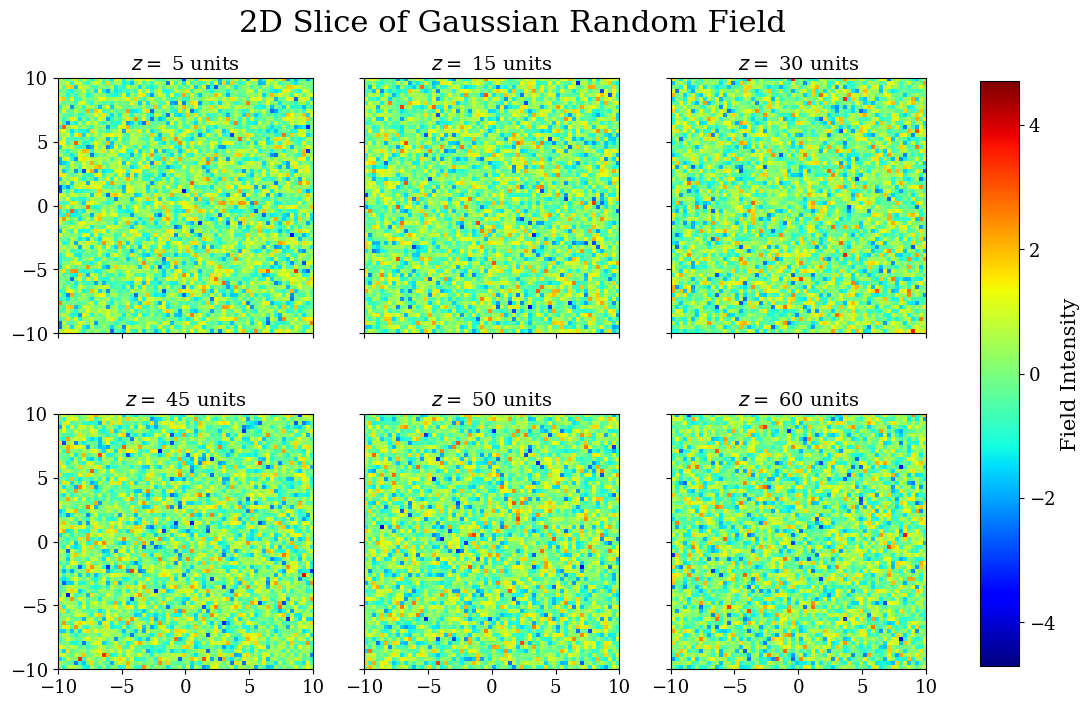

In [84]:
#For Gaussian Random Field

zs = [5,15,30,45,50,60]

#Plot in 3d
fig = plt.figure(figsize=(14,8),dpi=120)
ax = fig.add_subplot(111,projection='3d')
gauss_pl = ax.scatter(X_mesh,Y_mesh,Z_mesh,c=gaussian_field,
                      cmap='jet',alpha=1)
plt.colorbar(gauss_pl,shrink=0.5,aspect=10)

ax.set_xlabel("$x$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_ylabel("$y$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_zlabel("$z$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_title("Gaussian Random Field",size=18)

#Plot 2d slices
fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col',sharey='row',
                         figsize=(14,8),dpi=100)
for ax,z in zip(axes.flat,zs):
    im = ax.imshow(gaussian_field[:,:,z], cmap='jet', vmin=z_min, vmax=z_max,
                   extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()],
                   alpha=1)
    ax.set_title("$z =$ %.f units" %z,size=14)
color = fig.colorbar(im, ax=axes.ravel().tolist(),aspect=15,shrink=0.95)
color.set_label("Field Intensity",size=15)
plt.suptitle("2D Slice of Gaussian Random Field",x=0.45,y=0.95,size=22)

plt.show()

### $\textbf{3. } \text{Generating a Spherical Field of radius "R = 1 unit" for smoothening}$

In [48]:
#Generating a spherical field for smoothening
spherical_field_first = np.zeros((size,size,size))
radius = 1
value = X_mesh**2 + Y_mesh**2 + Z_mesh**2 <= radius**2
spherical_field_first[value] = 1
spherical_field_first[~value] = 0

sp_min, sp_max = np.abs(spherical_field_first).min(), np.abs(spherical_field_first).max()

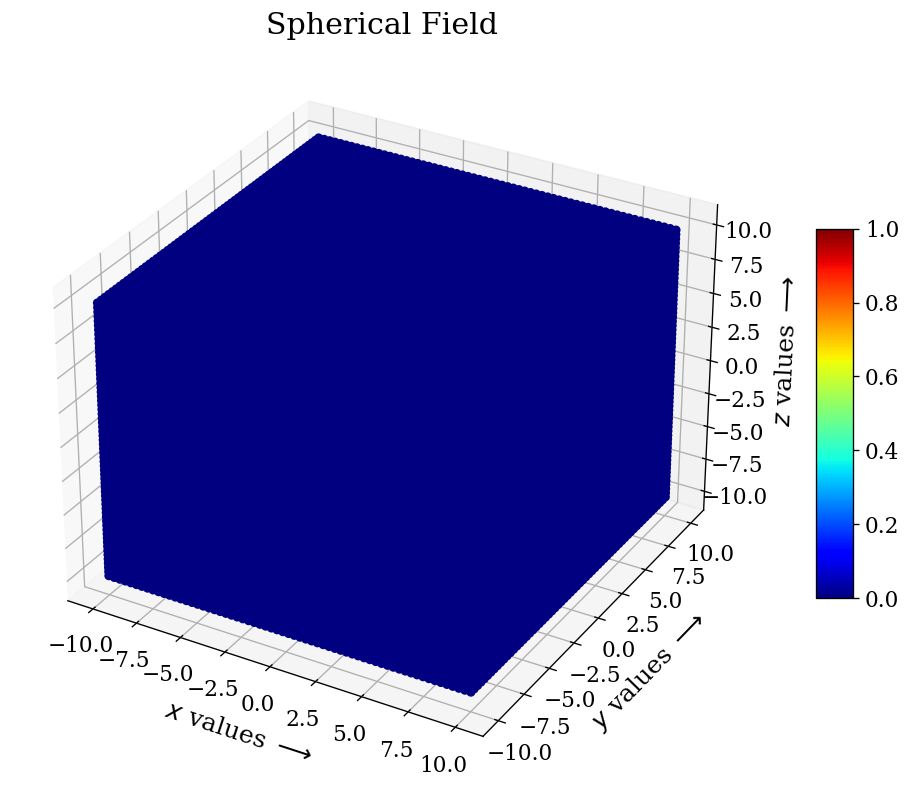

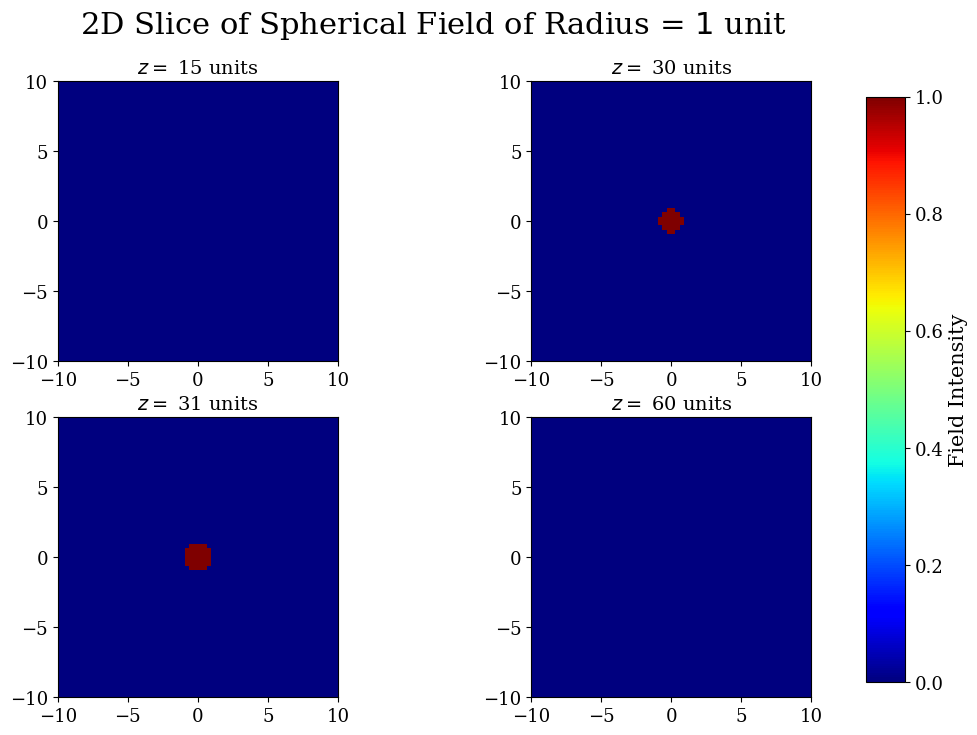

In [49]:
#For Spherical Field

zs = [15,30,31,60]

#Plot in 3d
fig = plt.figure(figsize=(14,8),dpi=120)
ax = fig.add_subplot(111,projection='3d')
gauss_pl = ax.scatter(X_mesh,Y_mesh,Z_mesh,c=spherical_field_first,
                      cmap='jet',alpha=1)
plt.colorbar(gauss_pl,shrink=0.5,aspect=10)

ax.set_xlabel("$x$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_ylabel("$y$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_zlabel("$z$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_title("Spherical Field",size=18)

#Plot 2d slices
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,8),dpi=100)
for ax,z in zip(axes.flat,zs):
    im = ax.imshow(spherical_field_first[:,:,z], cmap='jet', vmin=sp_min, vmax=sp_max,
                   extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()],
                   alpha=1)
    ax.set_title("$z =$ %.f units" %z,size=14)
color = fig.colorbar(im, ax=axes.ravel().tolist(),aspect=15,shrink=0.95)
color.set_label("Field Intensity",size=15)
plt.suptitle("2D Slice of Spherical Field of Radius = $1$ unit",x=0.475,y=0.97,size=22)

plt.show()

### $\textbf{4. } \text{Smoothening Gaussian field using Spherical Field of R = 1 unit}$

In [81]:
#Performing FT, multiplication, and IFT

fft_gaussian = abs(np.fft.fftshift(np.fft.fftn(gaussian_field)))
fft_spherical = abs(np.fft.fftshift(np.fft.fftn(spherical_field_first)))

convolved_grid = fft_gaussian*fft_spherical
bft_grid = abs(np.fft.fftshift(np.fft.ifftn(convolved_grid)))

bft_min, bft_max = np.abs(bft_grid).min()/100, np.abs(bft_grid).max()/100

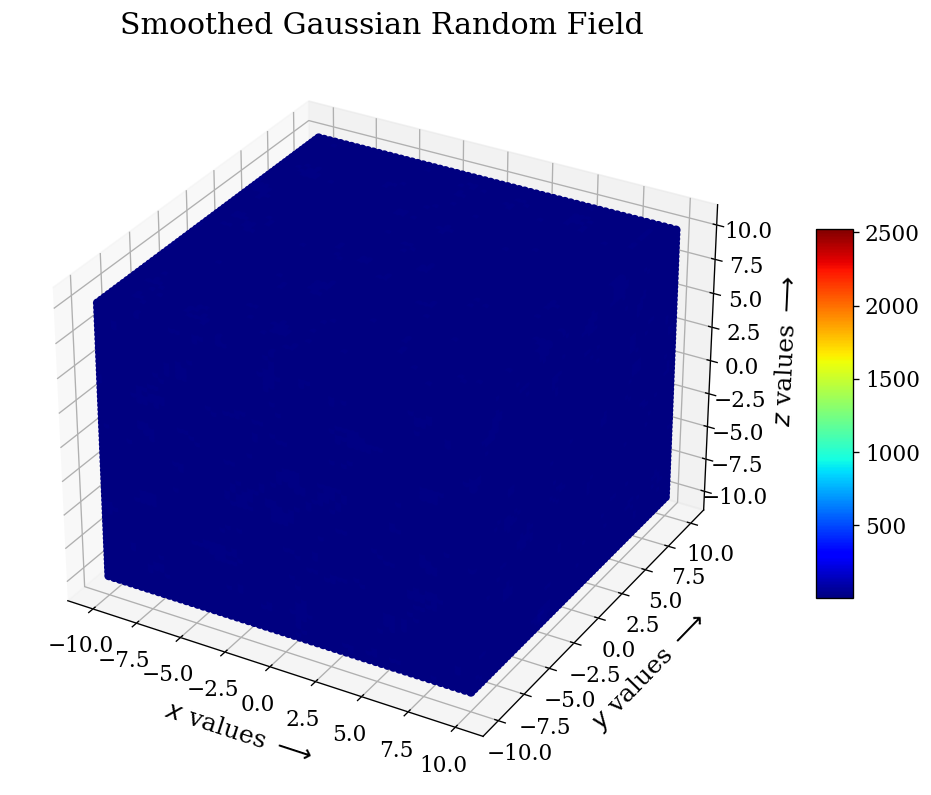

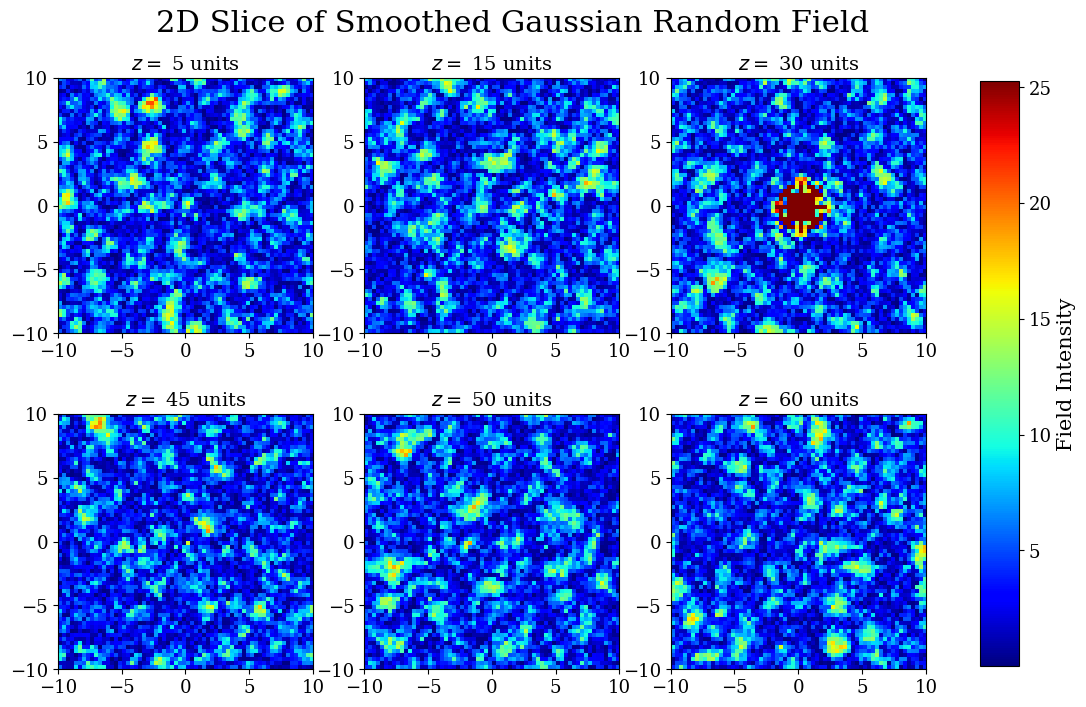

In [86]:
#For Smoothed Gaussian Random Field

zs = [5,15,30,45,50,60]

#Plot in 3d
fig = plt.figure(figsize=(14,8),dpi=120)
ax = fig.add_subplot(111,projection='3d')
gauss_pl = ax.scatter(X_mesh,Y_mesh,Z_mesh,c=bft_grid,
                      cmap='jet',alpha=1)
plt.colorbar(gauss_pl,shrink=0.5,aspect=10)

ax.set_xlabel("$x$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_ylabel("$y$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_zlabel("$z$ values $\longrightarrow$",size=15,labelpad=7.5)
ax.set_title("Smoothed Gaussian Random Field",size=18)

#Plot 2d slices
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8),dpi=100)
for ax,z in zip(axes.flat,zs):
    im = ax.imshow(bft_grid[:,:,z], cmap='jet', vmin=bft_min, vmax=bft_max,
                   extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()],
                   alpha=1)
    ax.set_title("$z =$ %.f units" %z,size=14)
color = fig.colorbar(im, ax=axes.ravel().tolist(),aspect=15,shrink=0.95)
color.set_label("Field Intensity",size=15)
plt.suptitle("2D Slice of Smoothed Gaussian Random Field",x=0.45,y=0.95,size=22)

plt.show()

### $\textbf{5. } \text{Smoothening Gaussian field using Spherical Fields of varying radii}$

In [113]:
#Varying the radius of the sphere from 1 unit to (size/2) unit and repeating 
radius = np.linspace(1,int(size/2),32,endpoint=True)
spherical_grids = np.zeros(len(radius),dtype=object)
bft_spherical_grids = np.zeros(len(radius),dtype=object)
final_mean = np.zeros(len(radius))
final_var = np.zeros(len(radius))

for q in range(len(radius)):
    spherical_field = np.zeros((size,size,size))
    check = X_mesh**2 + Y_mesh**2 + Z_mesh**2 <= radius[q]**2
    spherical_field[check] = 1
    spherical_field[~check] = 0

    spherical_grids[q] = spherical_field
    fft_spherical = abs(np.fft.fftshift(np.fft.fftn(spherical_grids[q])))
    
    convolved_grid = fft_gaussian*fft_spherical
    
    bft_spherical_grids[q] = abs(np.fft.fftshift(np.fft.ifftn(convolved_grid))) 
        
    final_mean[q] = np.mean(bft_spherical_grids[q])
    final_var[q] = np.var(bft_spherical_grids[q])

/tmp/ipykernel_673237/1530616188.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8),dpi=100)


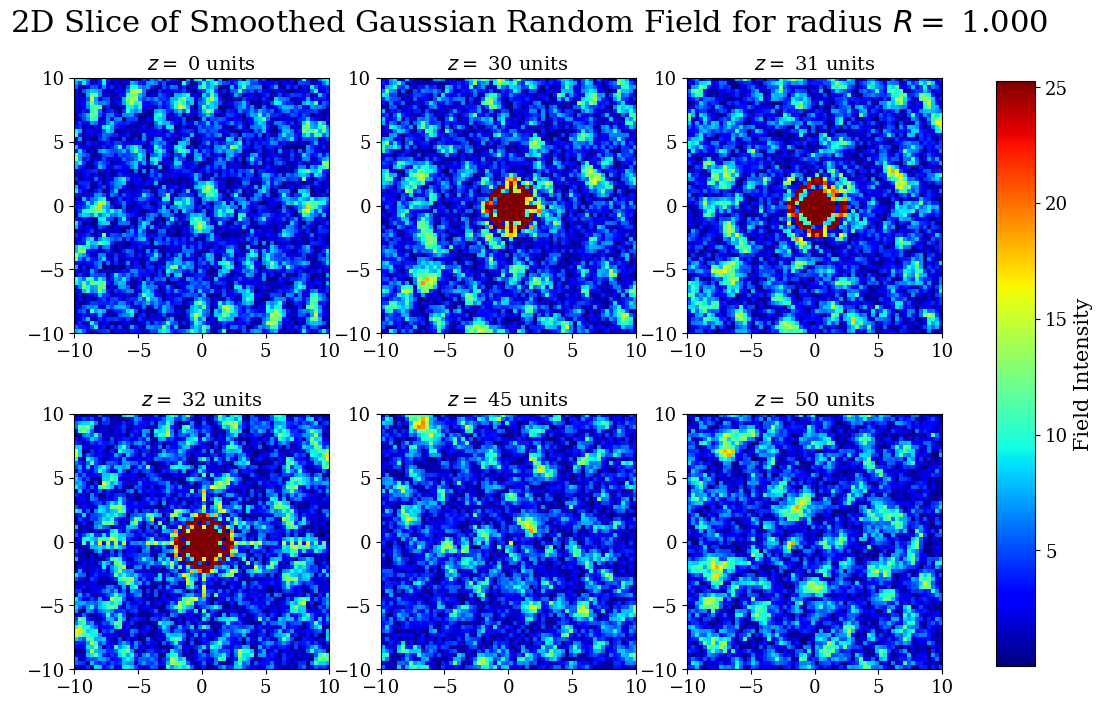

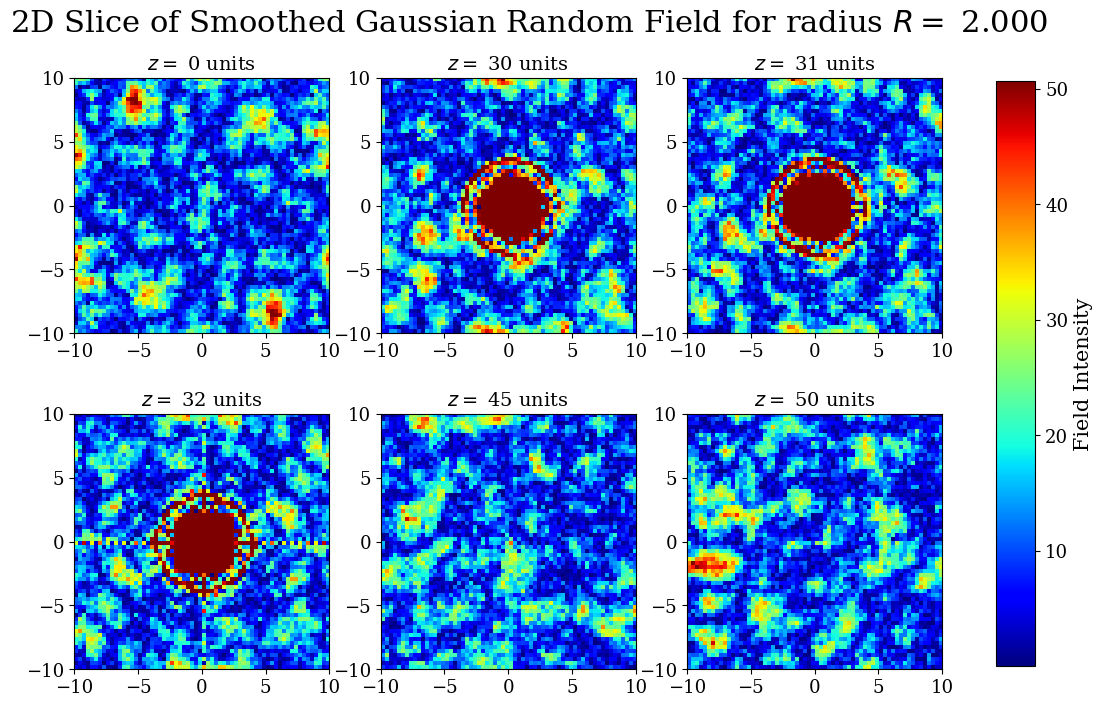

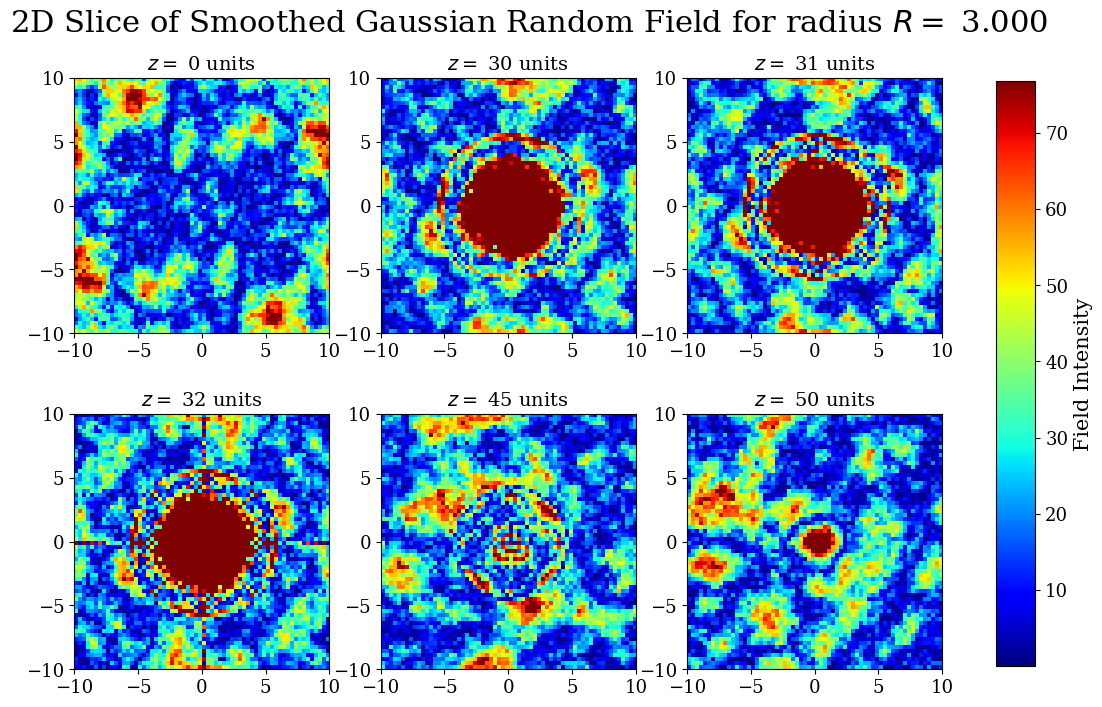

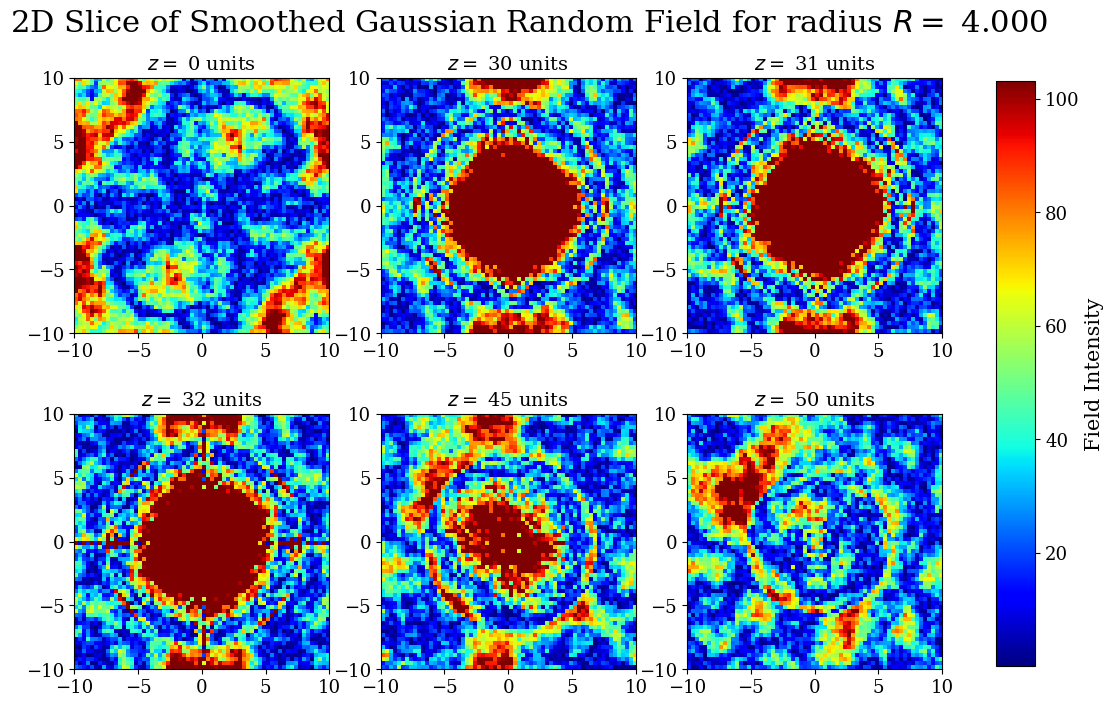

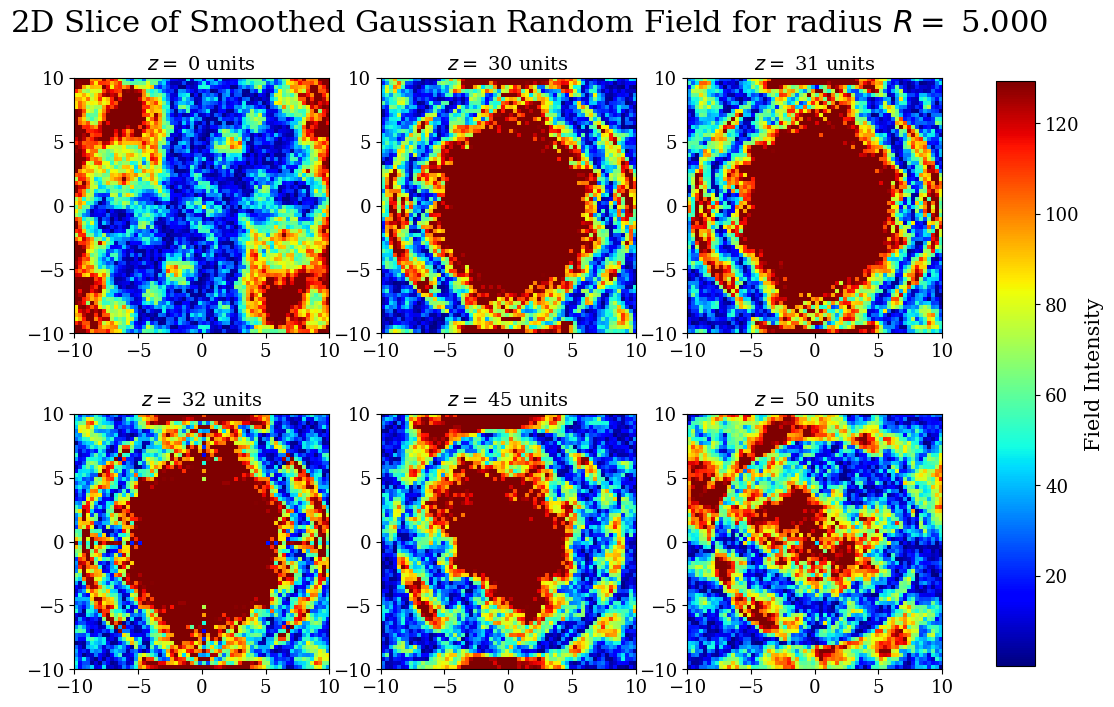

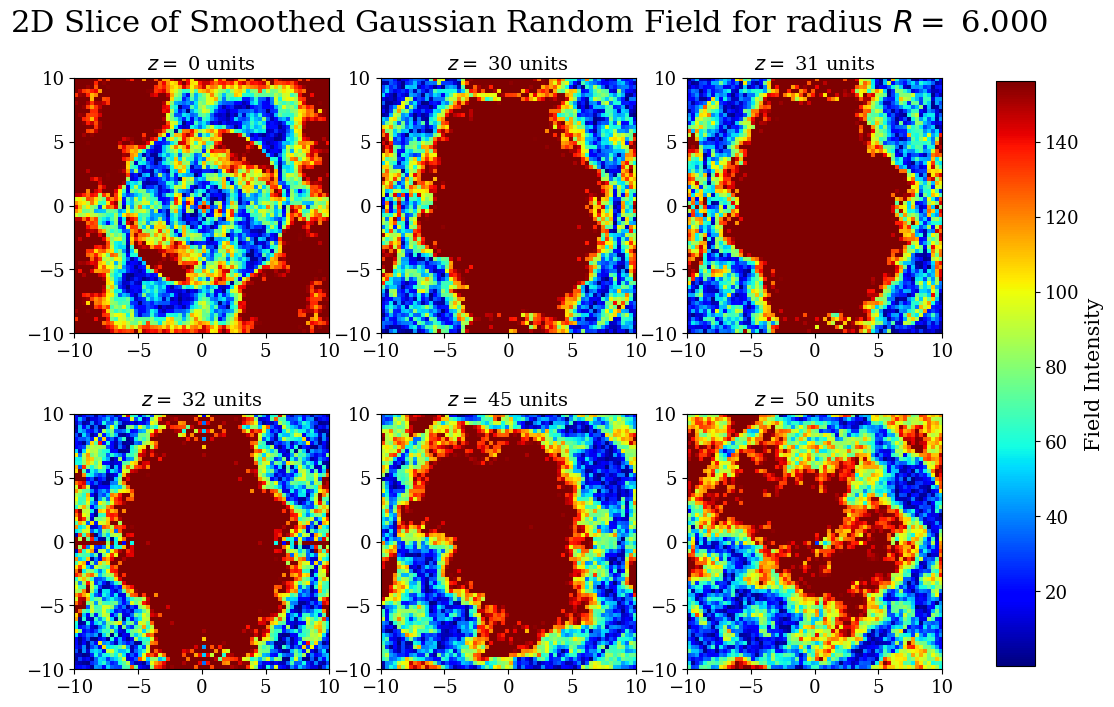

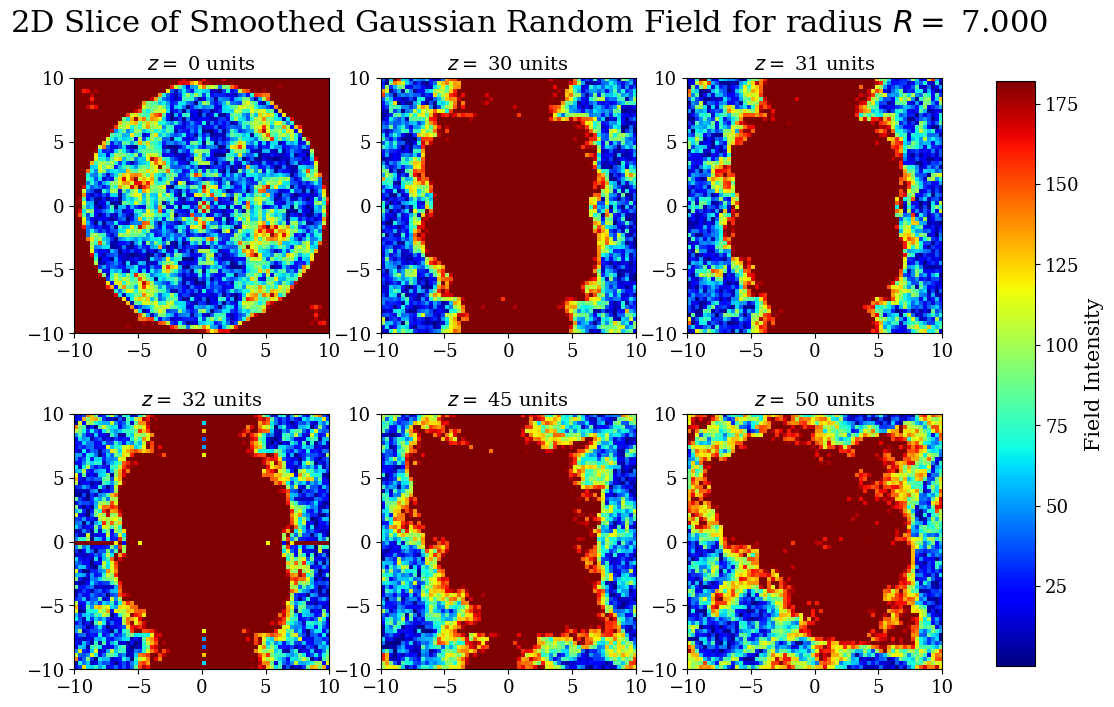

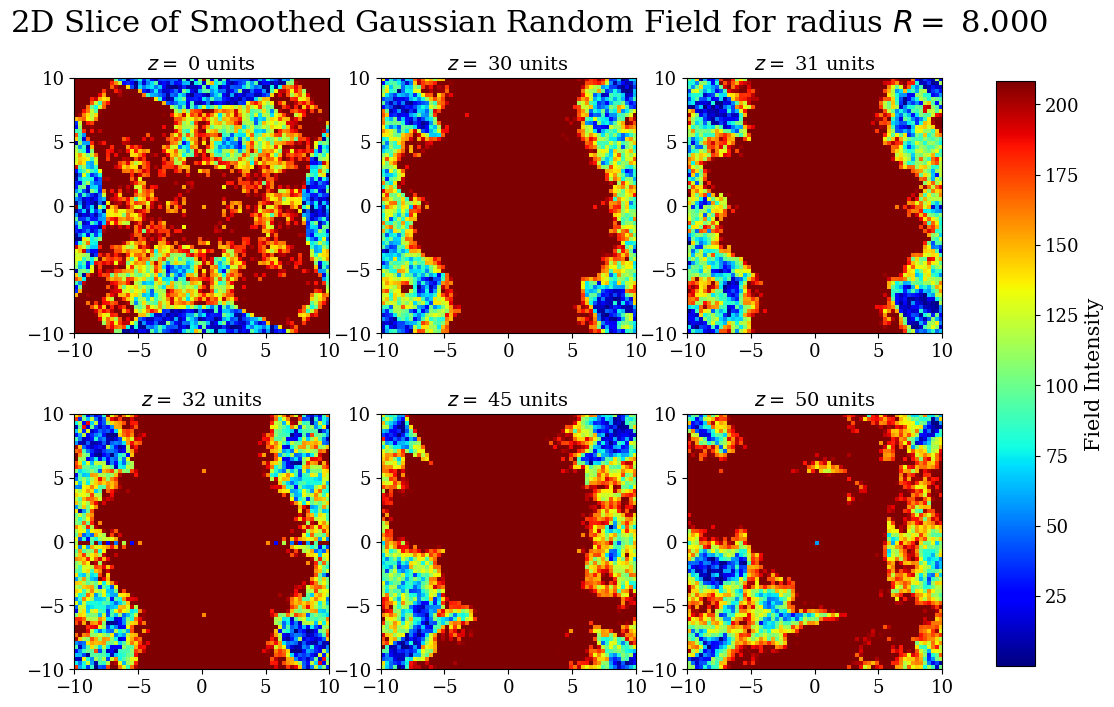

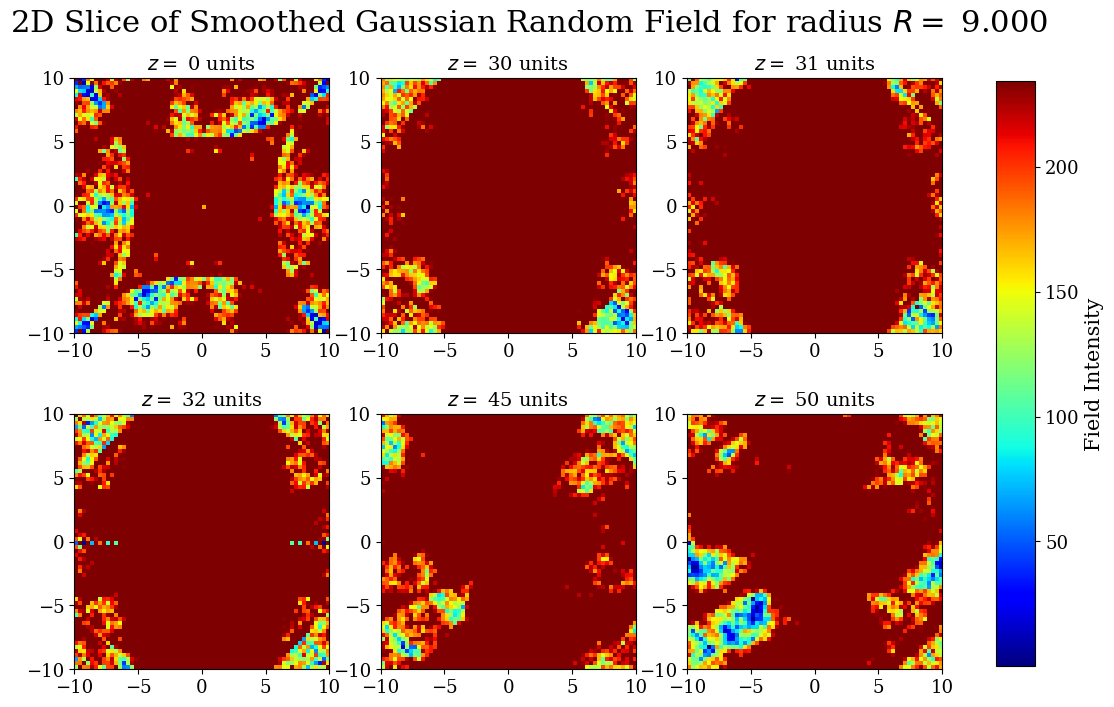

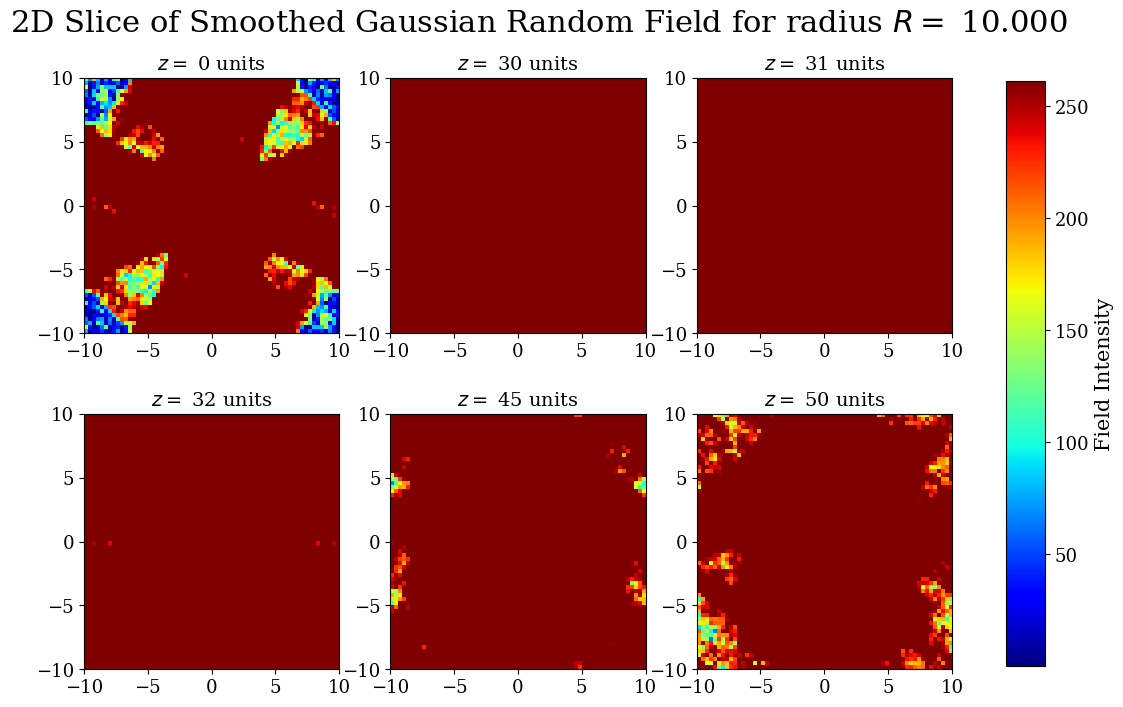

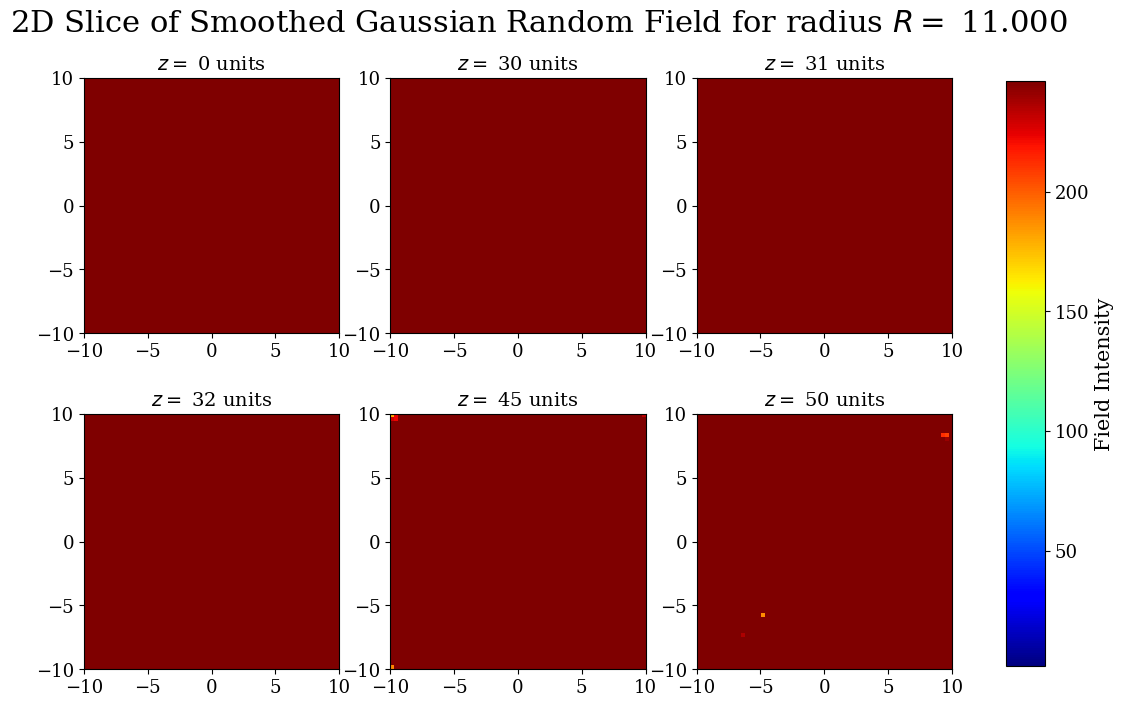

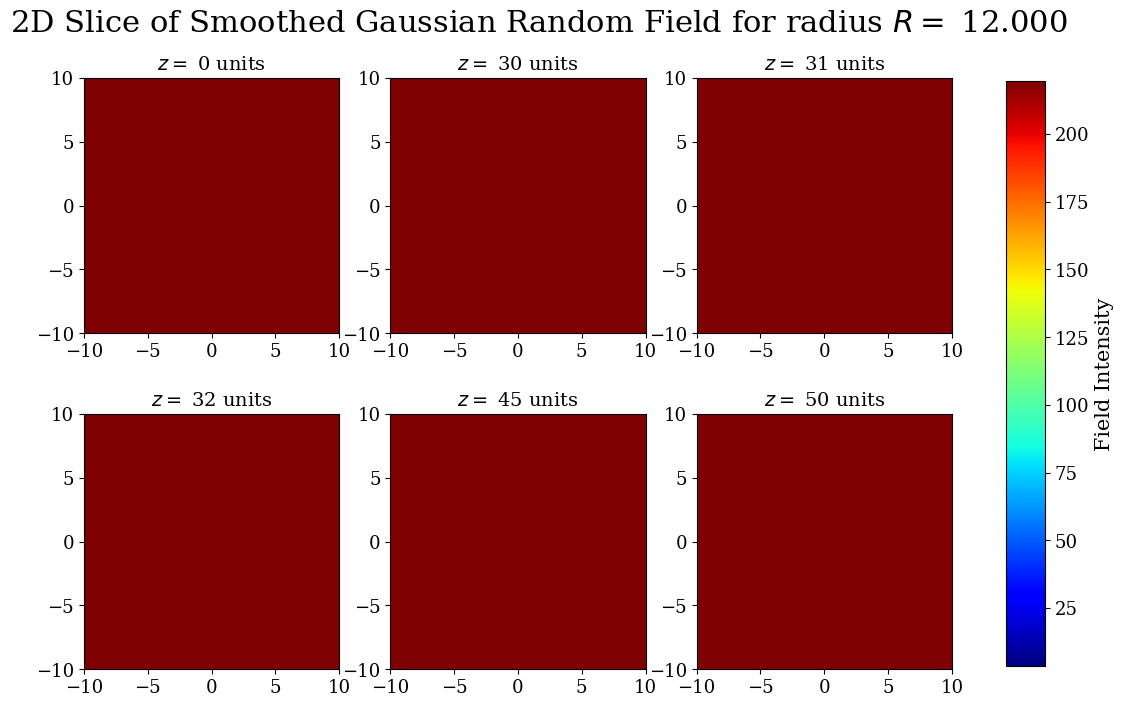

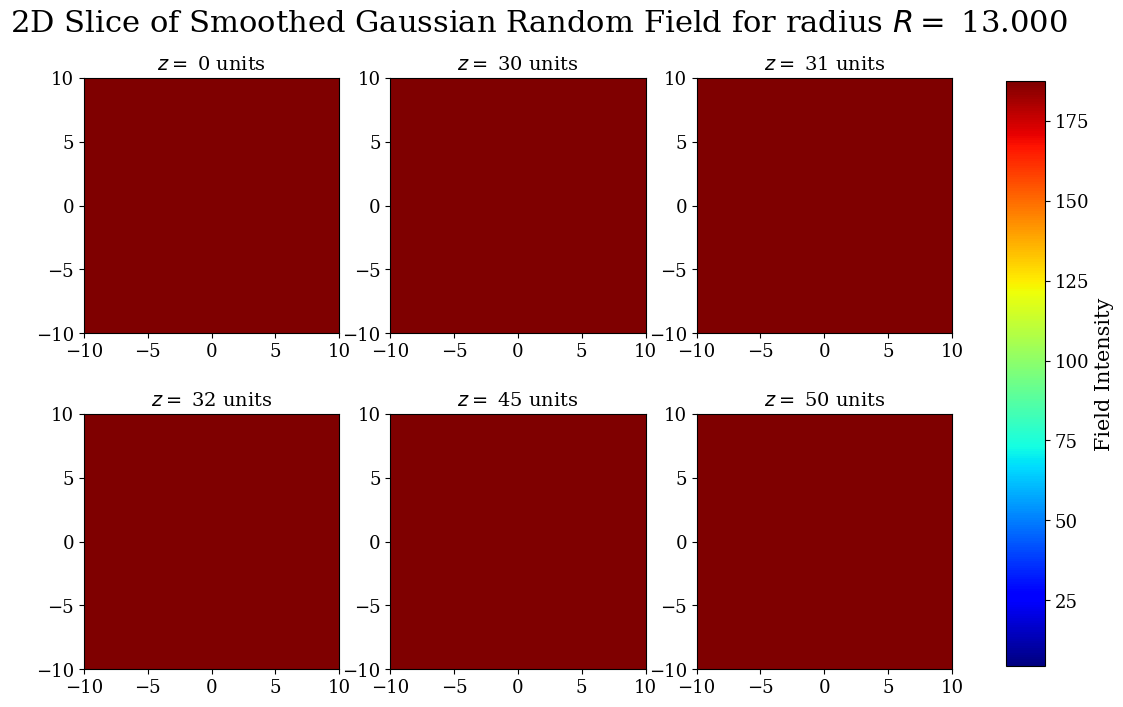

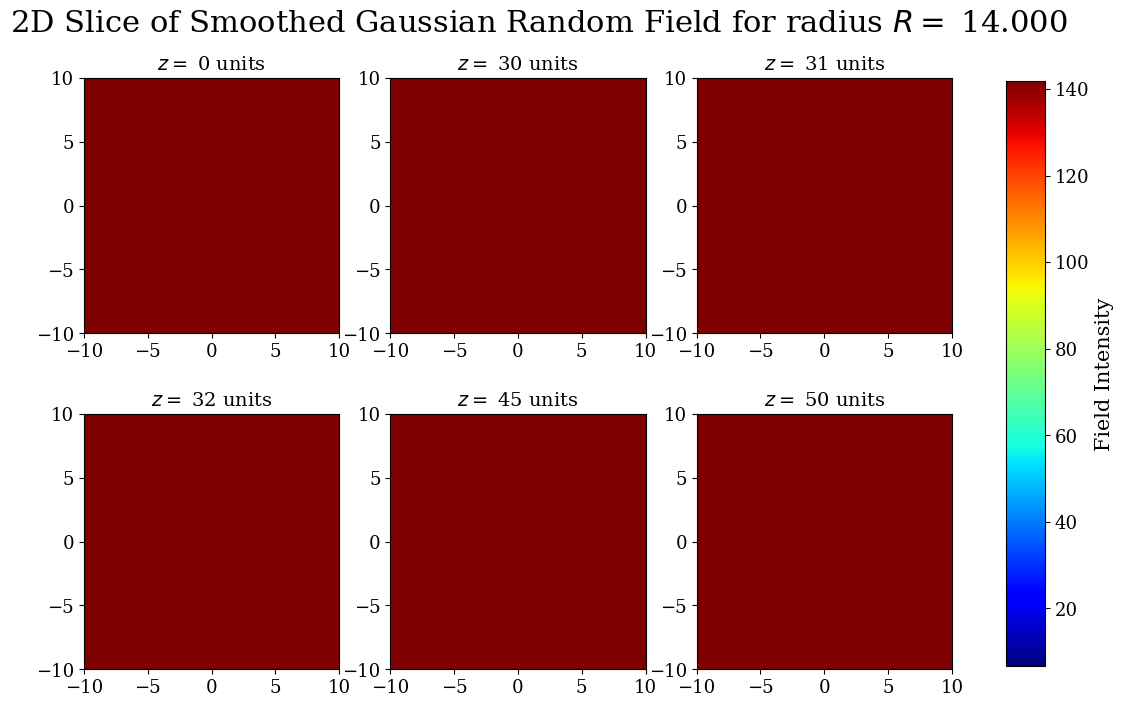

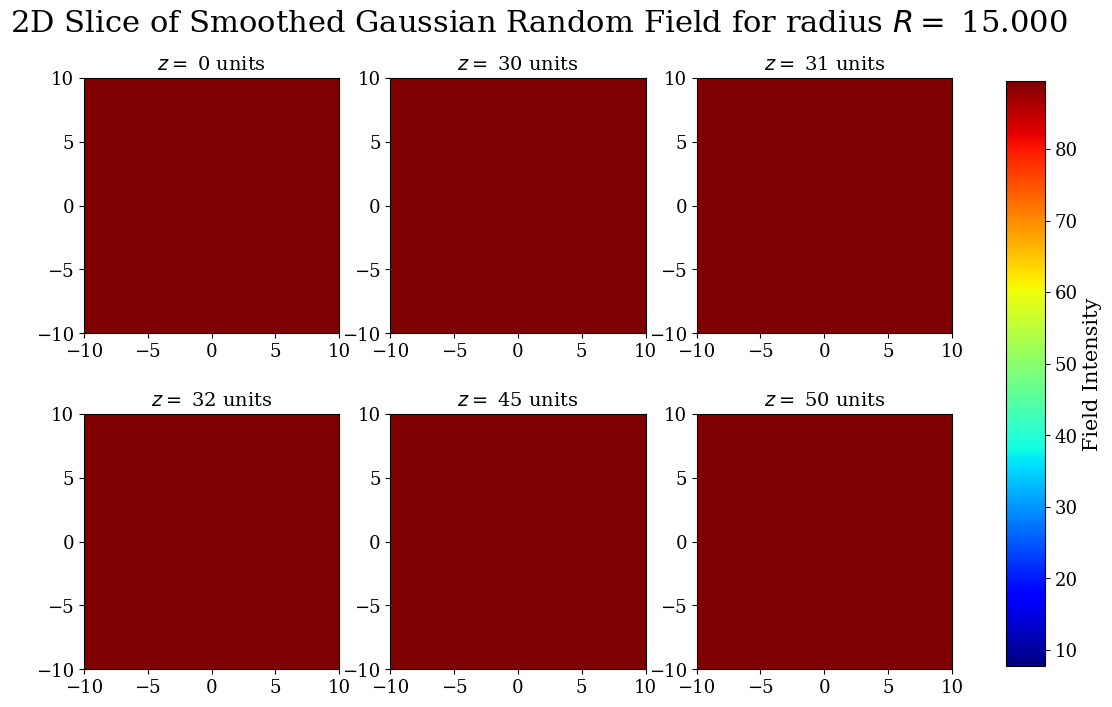

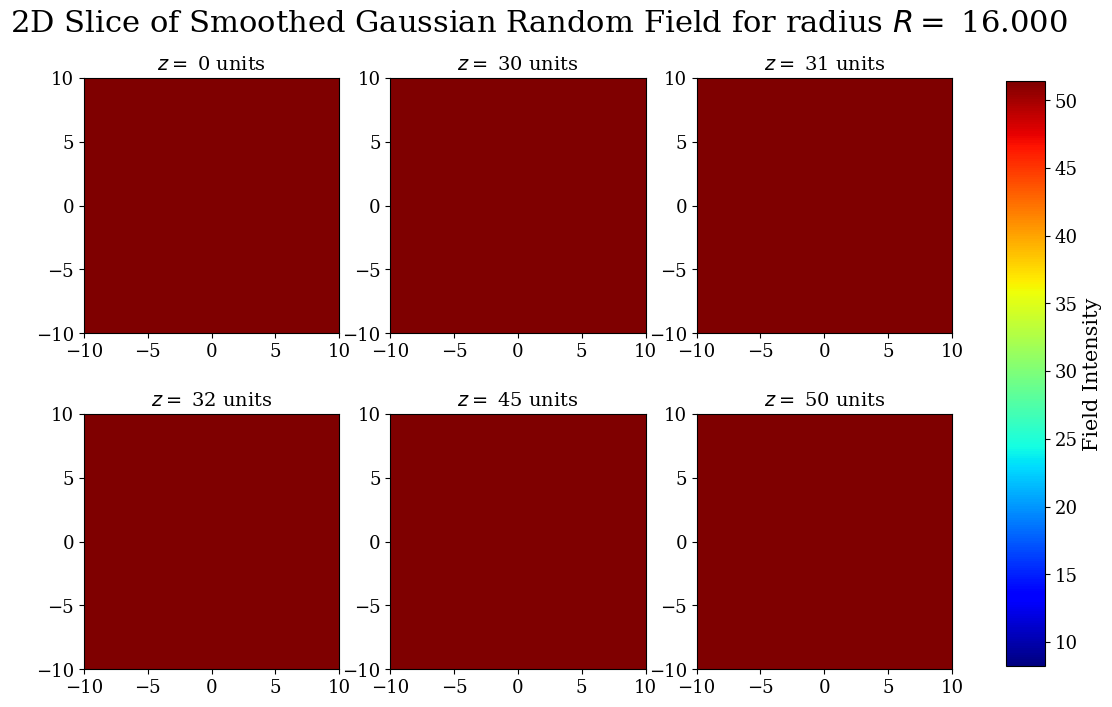

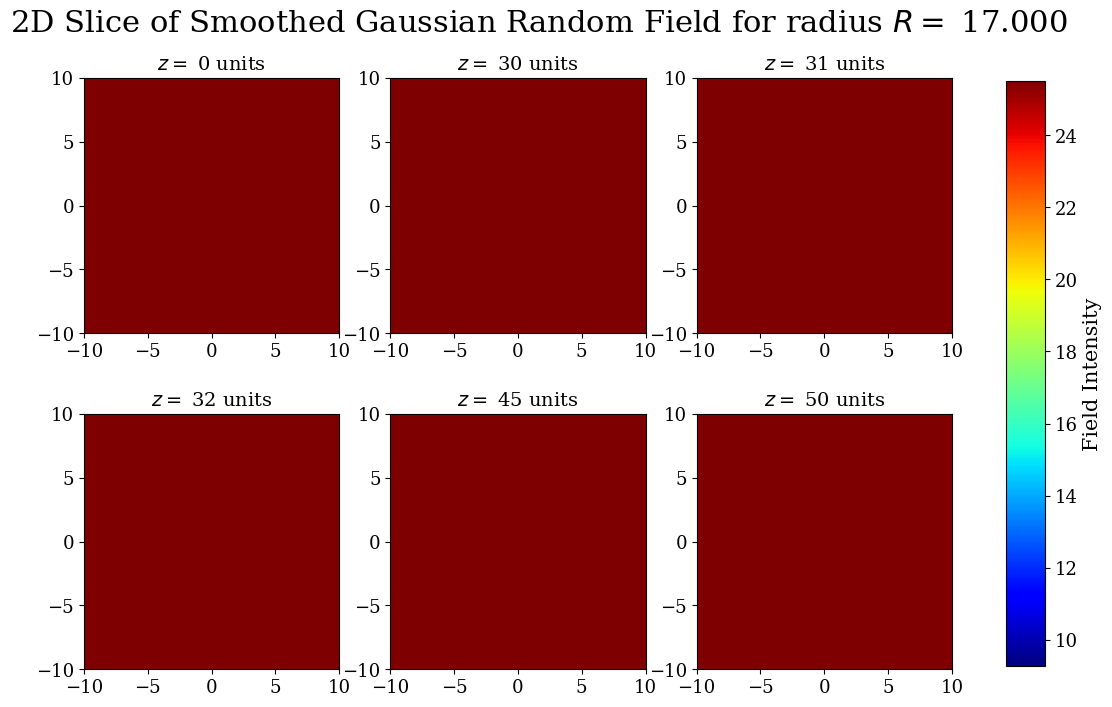

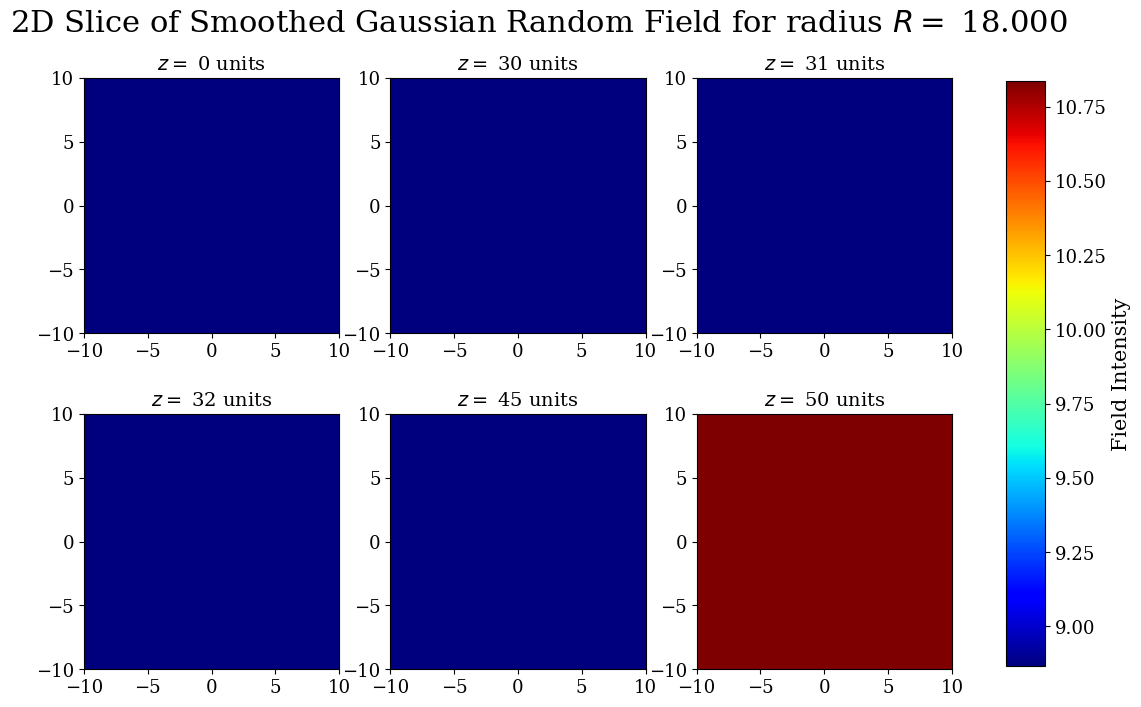

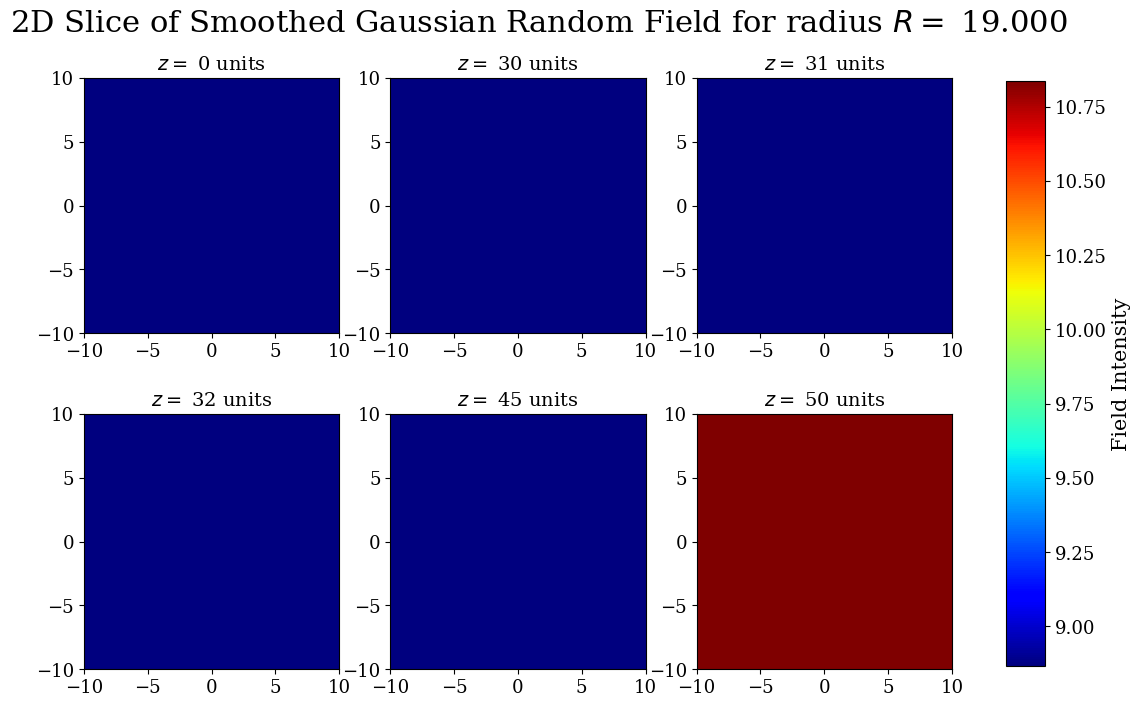

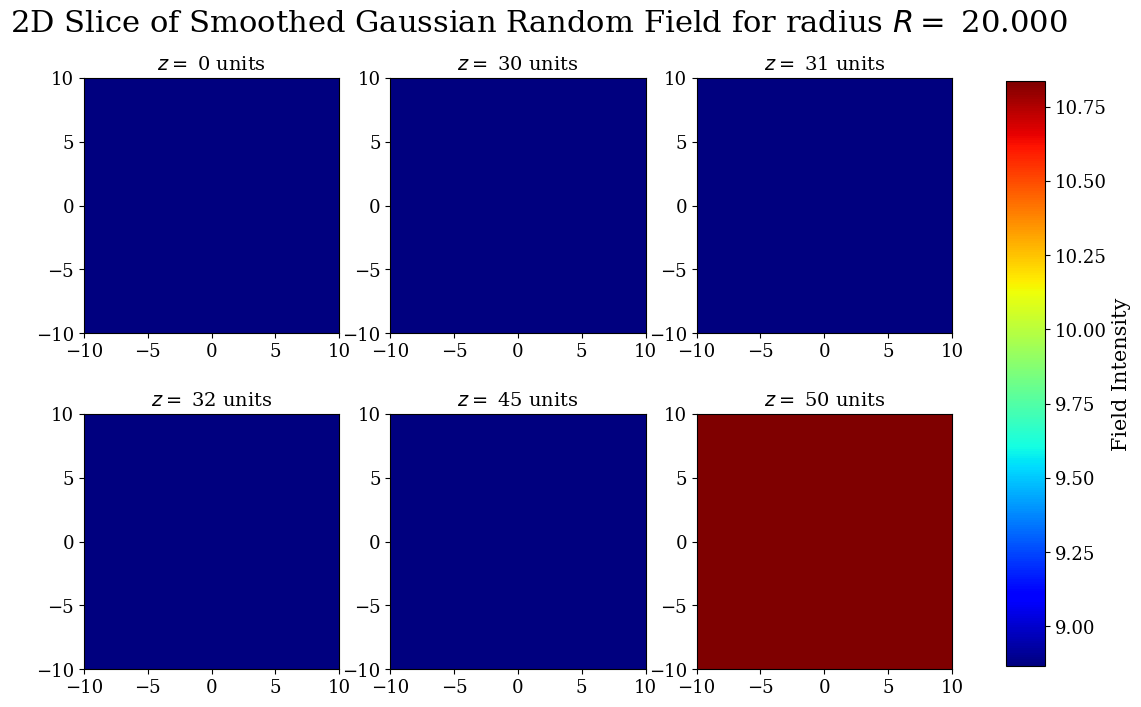

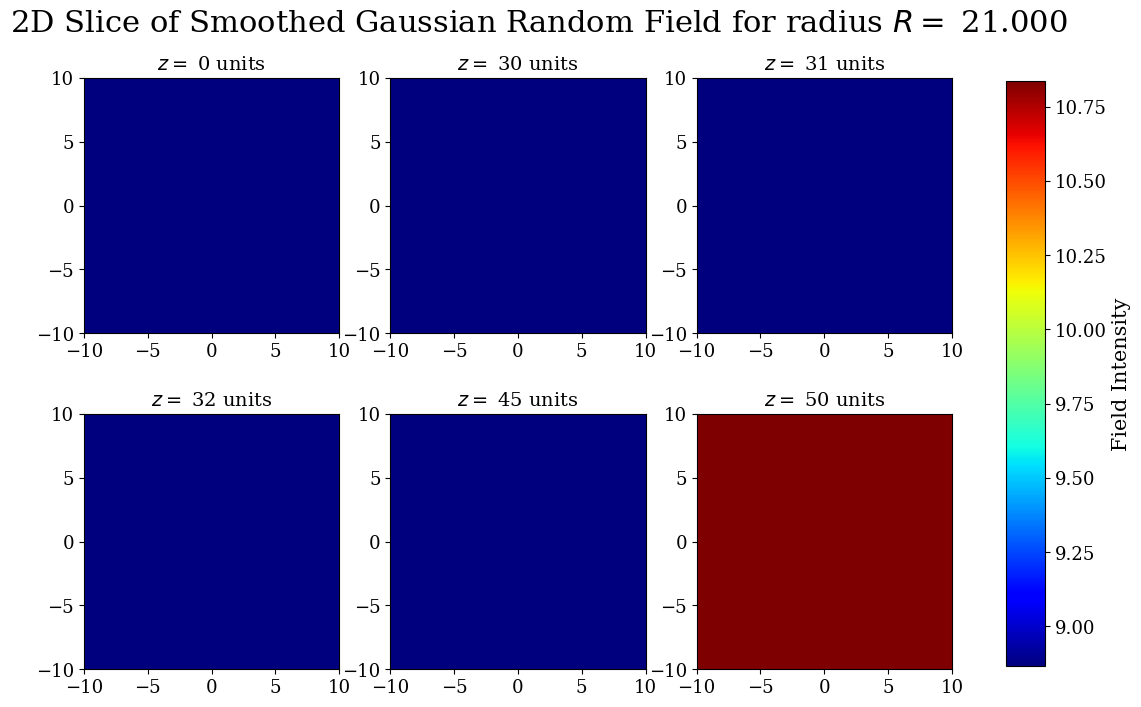

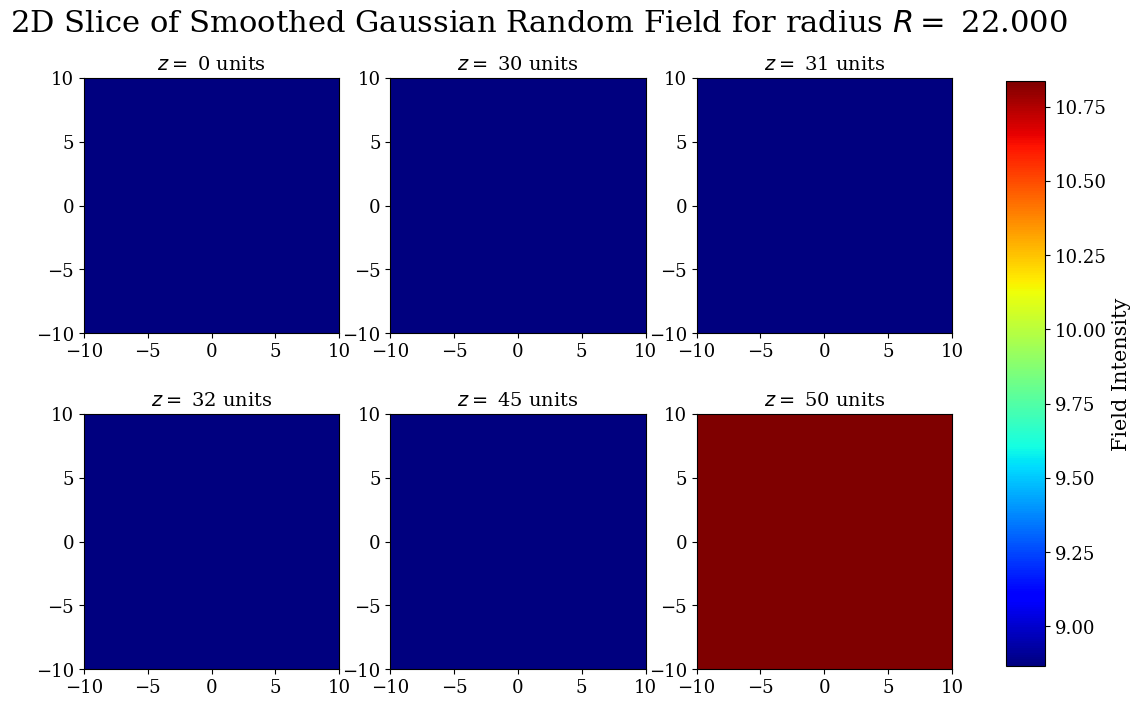

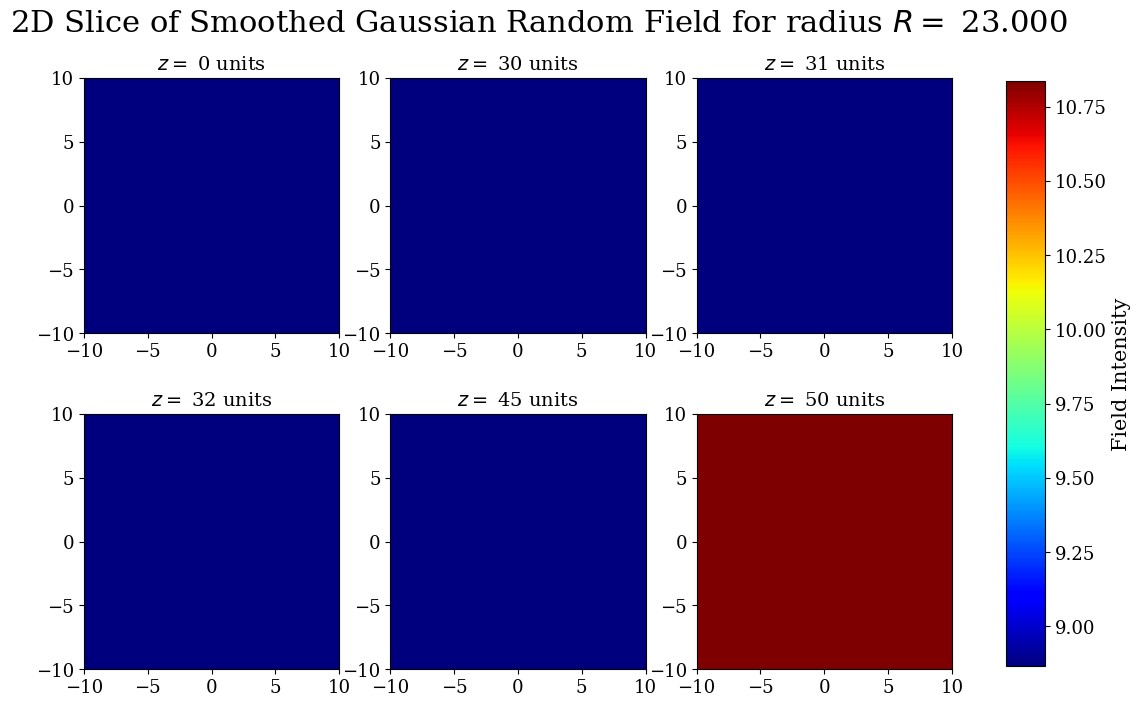

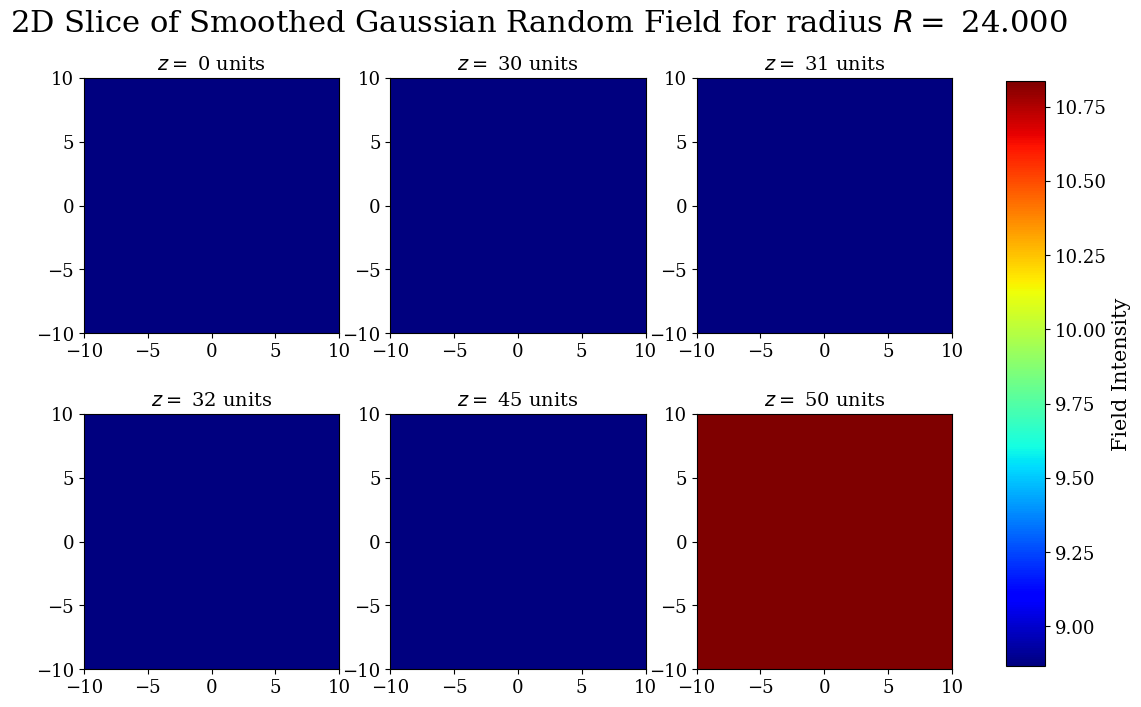

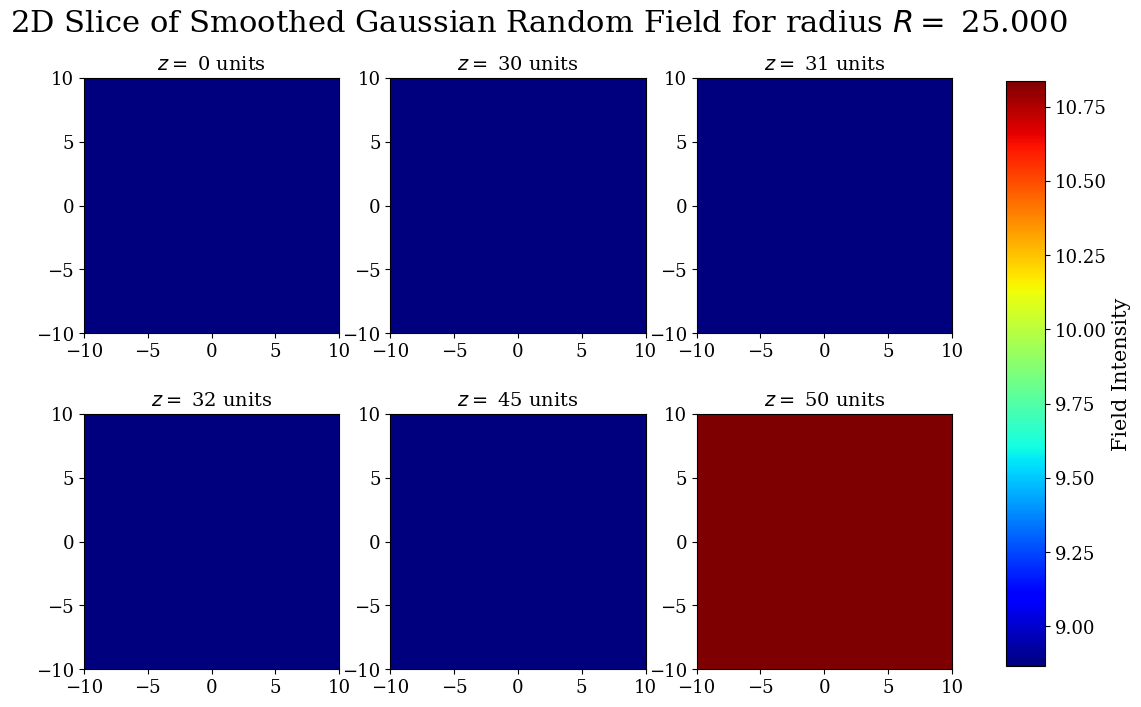

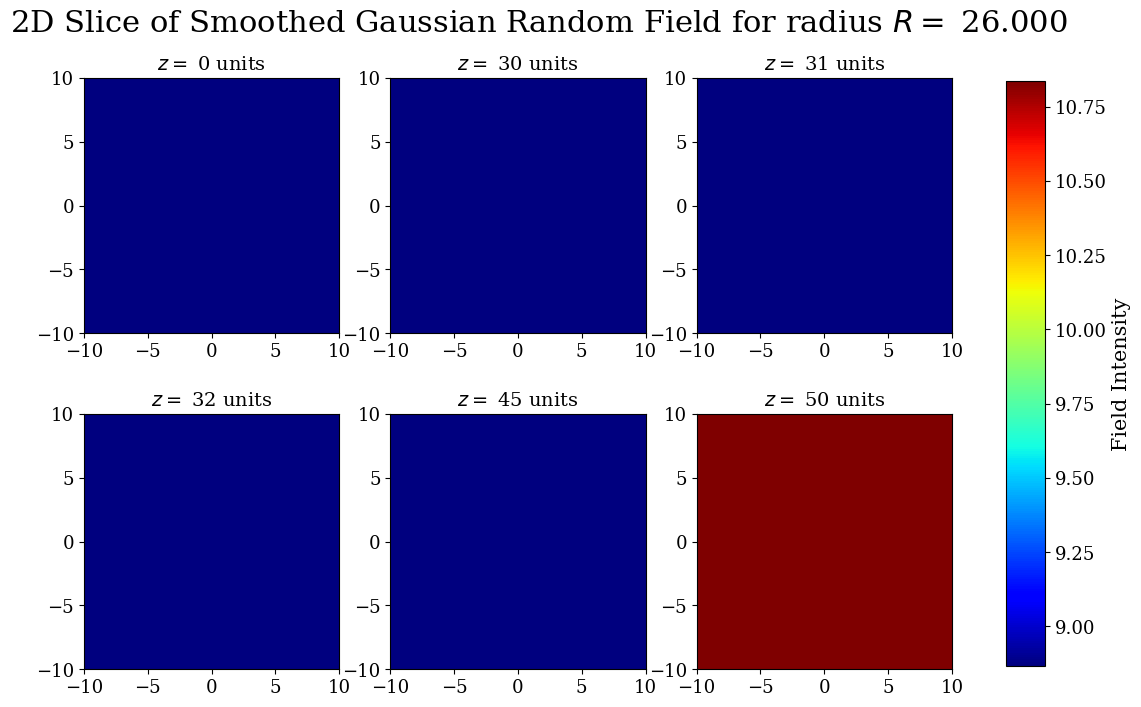

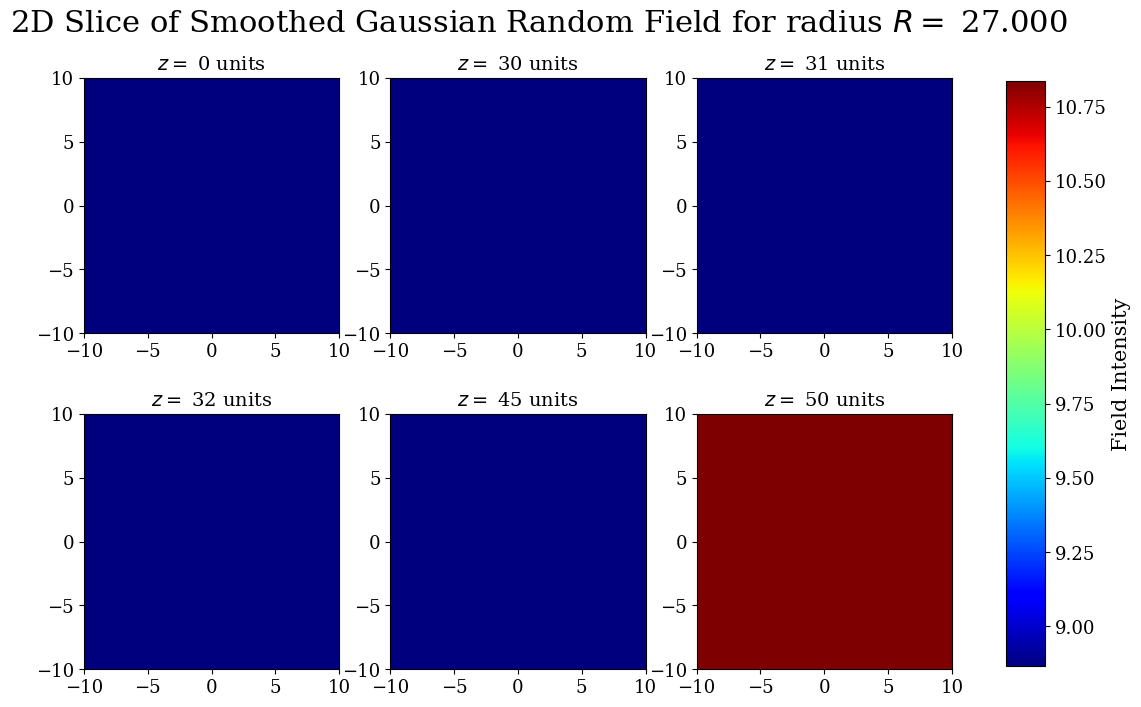

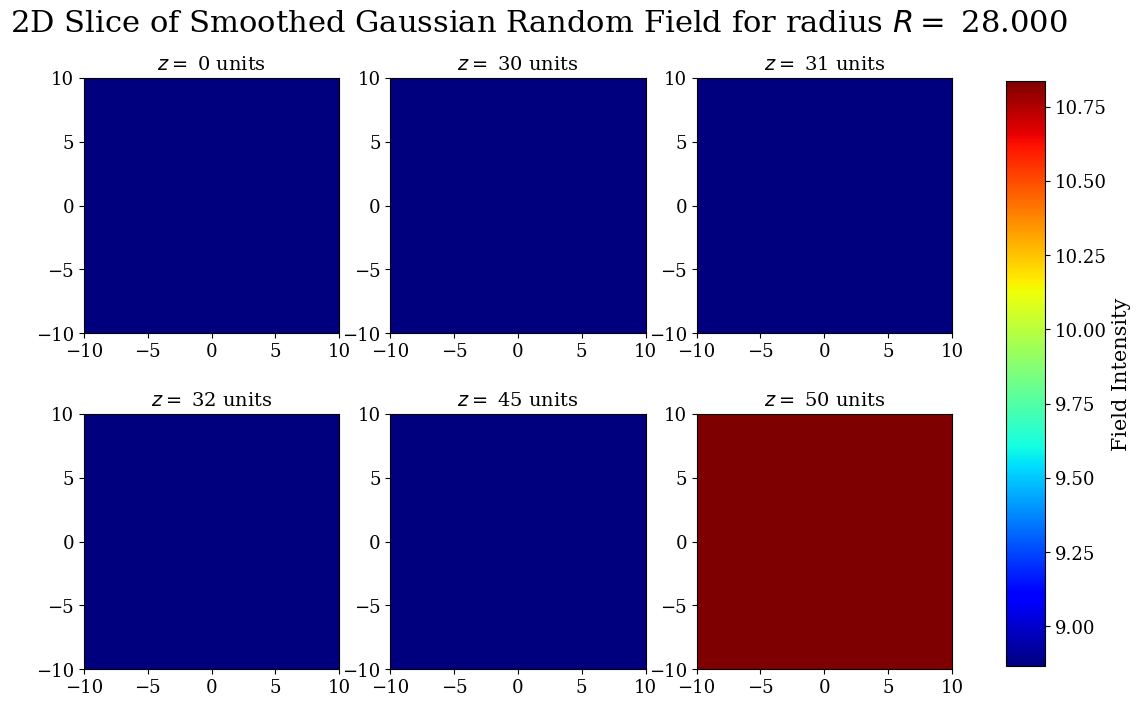

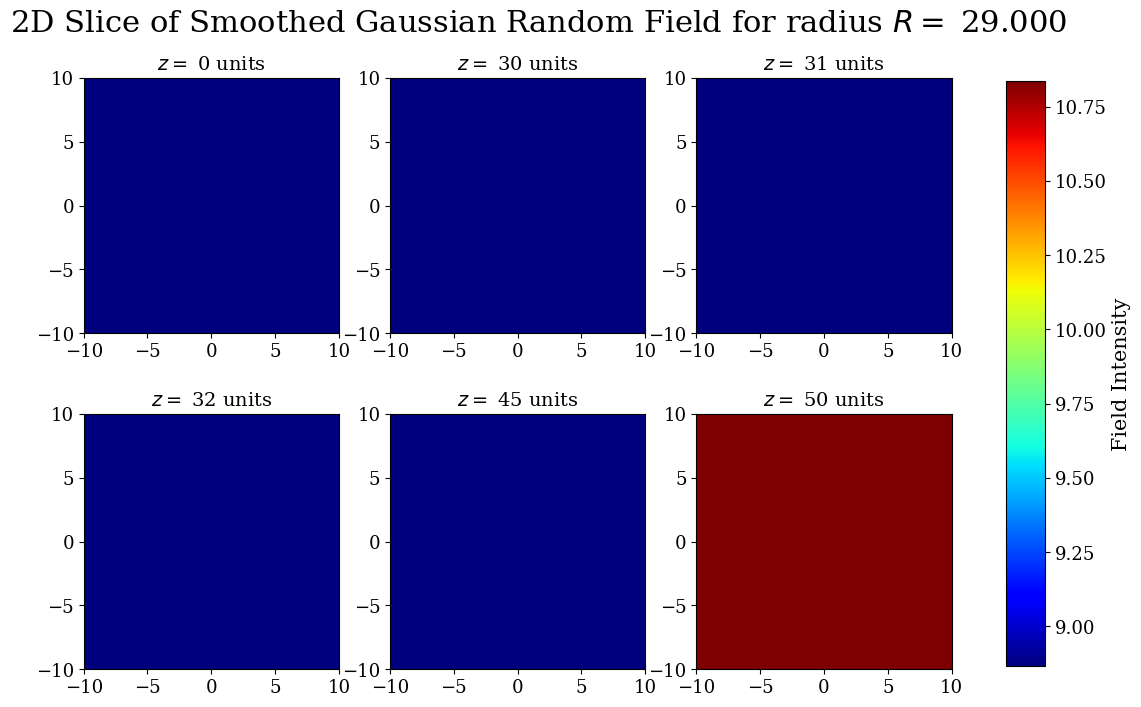

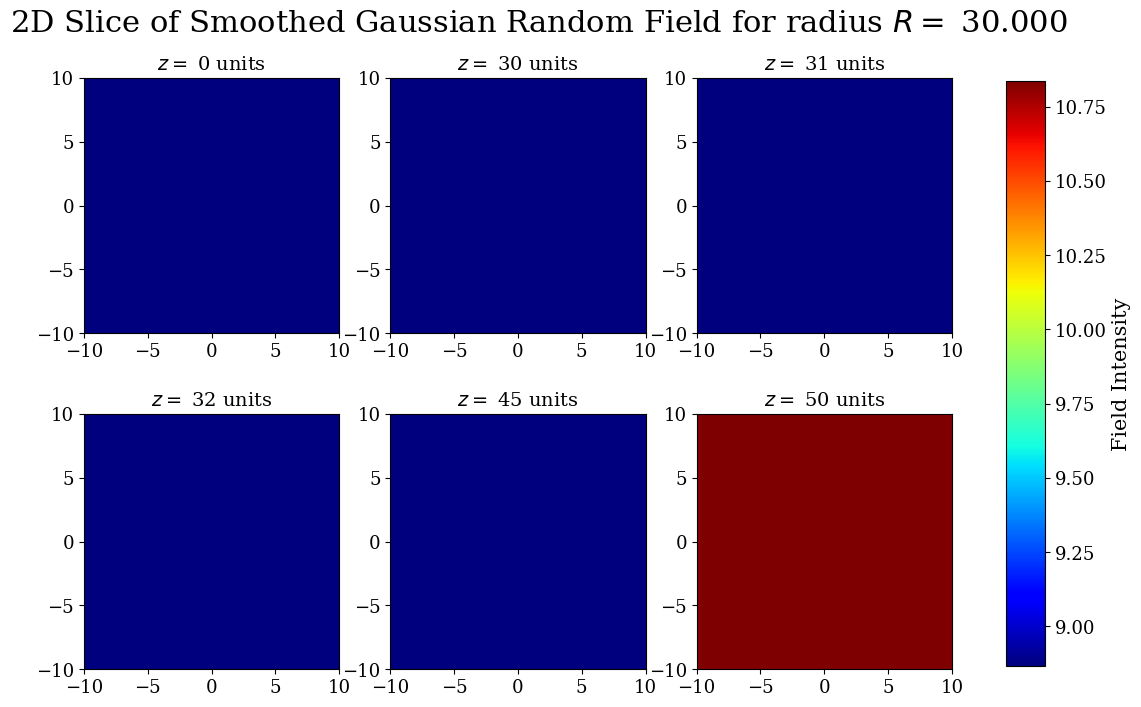

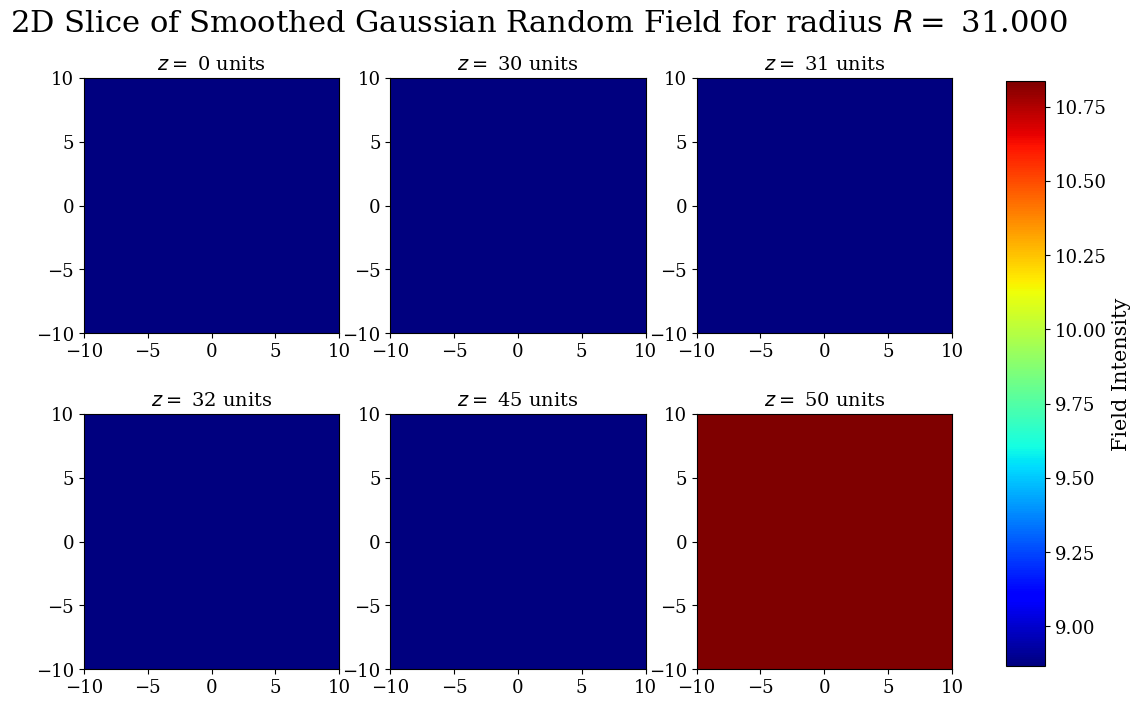

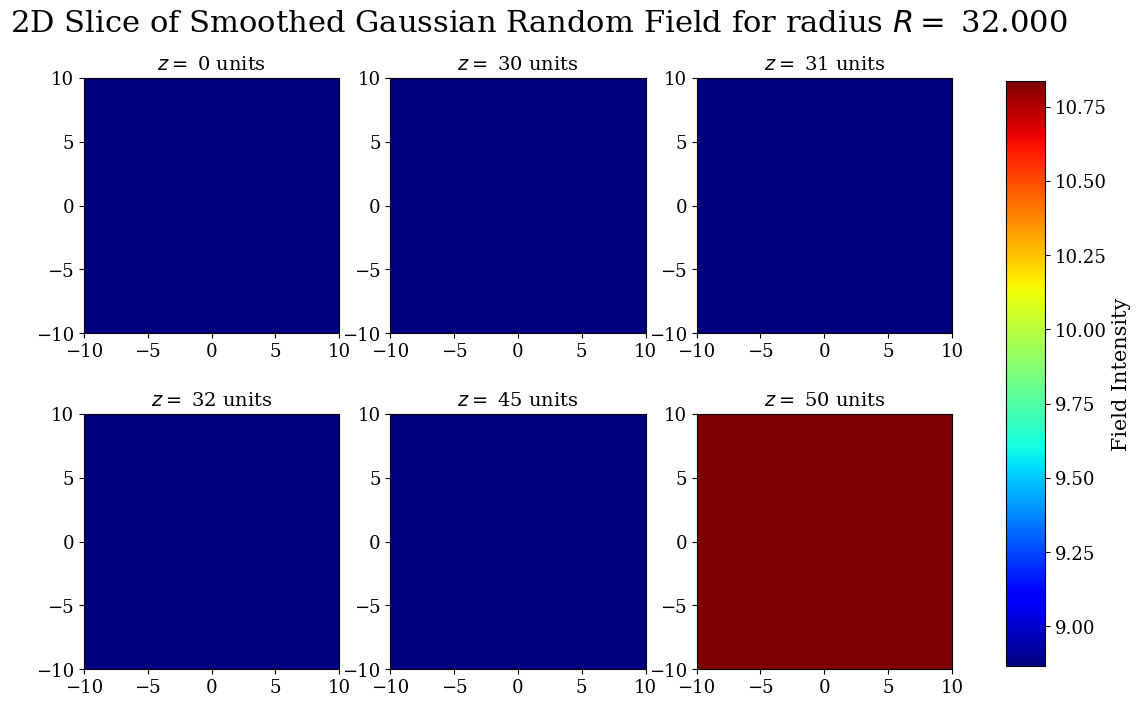

In [114]:
zs = [0,30,31,32,45,50,63]

# fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,20),dpi=180,
#                          subplot_kw=dict(projection='3d'))
for r in zip(range(len(radius))):
    bft_min = bft_spherical_grids[r].min()/100 
    bft_max = bft_spherical_grids[r].max()/100
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8),dpi=100)
    for ax,z in zip(axes.flat,zs):
        im = ax.imshow(bft_spherical_grids[r][:,:,z], cmap='jet', vmin=bft_min, vmax=bft_max,
                       extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()],
                       alpha=1)
        ax.set_title("$z =$ %.f units" %z,size=14)
    color = fig.colorbar(im, ax=axes.ravel().tolist(),aspect=15,shrink=0.95)
    color.set_label("Field Intensity",size=15)
    plt.suptitle("2D Slice of Smoothed Gaussian Random Field for radius $R =$ %.3f" %radius[r],
                 x=0.45,y=0.95,size=22)

### $\textbf{6. } \text{Variation of Mean and Variance with smoothening radius}$

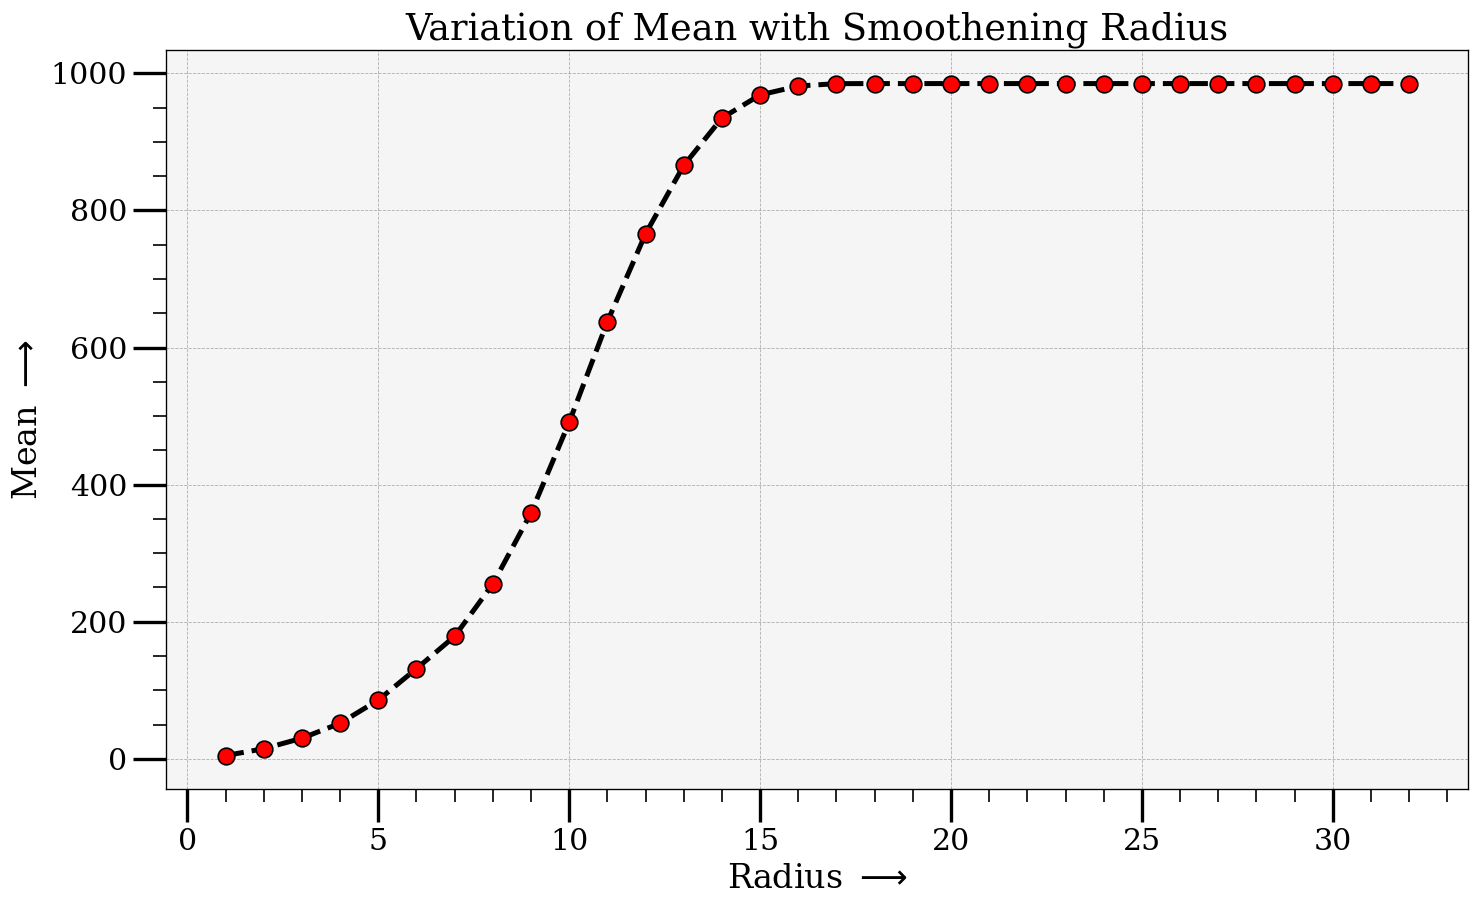

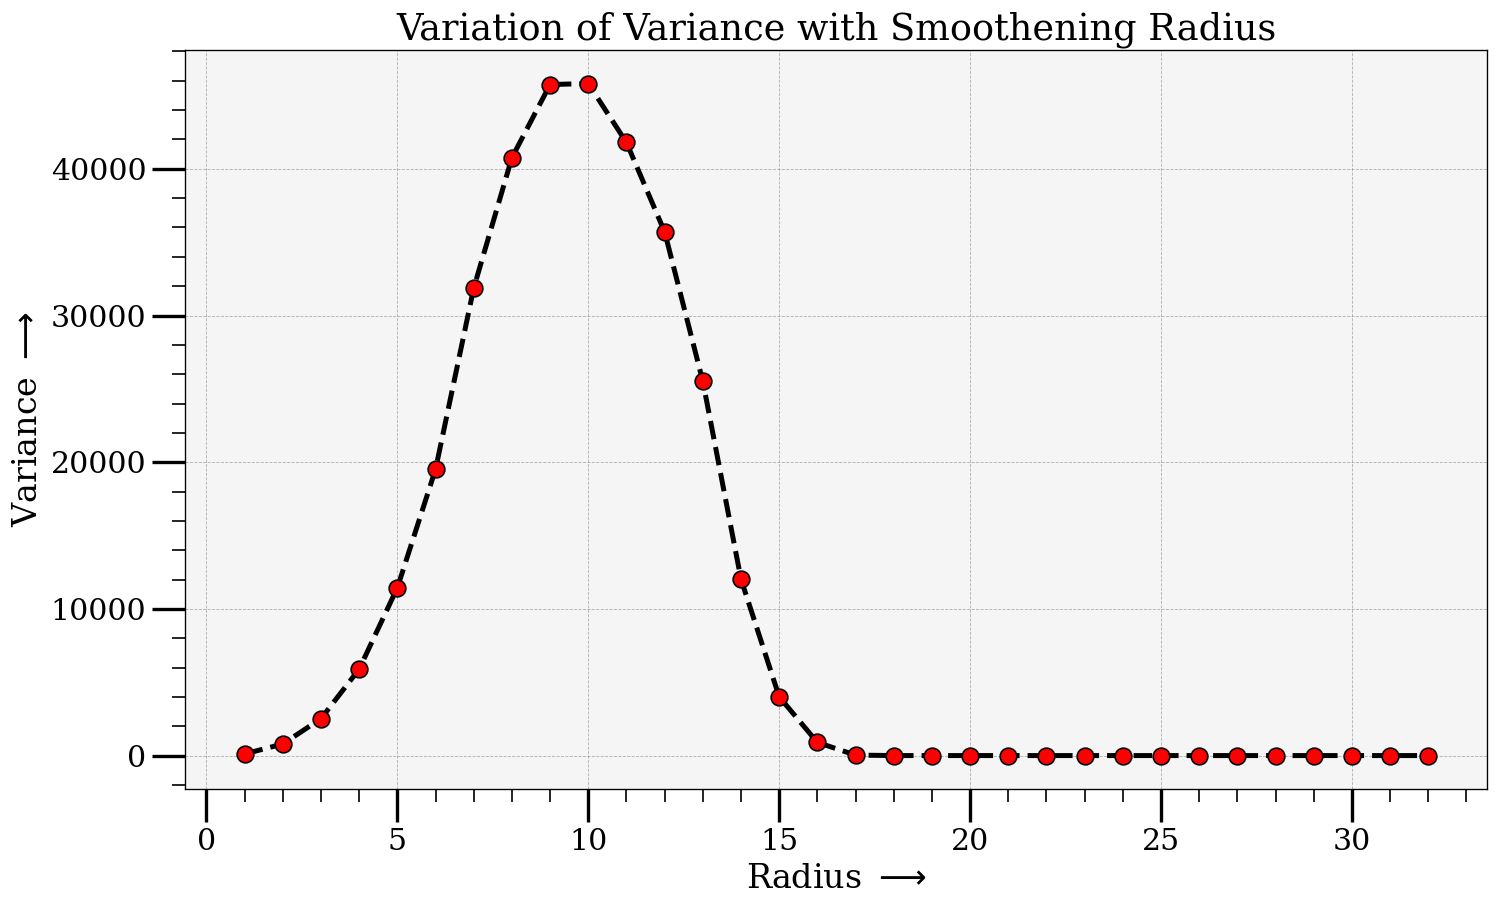

In [135]:
fig,ax = plt.subplots(figsize=(14,8),dpi=120)
ax.set_facecolor('whitesmoke')
ax.plot(radius,final_mean,'ko--',lw=3.0,ms=10,markerfacecolor='red')
ax.set_ylabel("Mean $\longrightarrow$",size=20)
ax.set_xlabel("Radius $\longrightarrow$",size=20)
ax.set_title("Variation of Mean with Smoothening Radius",size=22)

plt.xticks(size=18)
plt.yticks(size=18)
plt.minorticks_on()

ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=8, width=1, which='minor')

plt.grid(alpha=0.6,color='grey', linestyle='--', linewidth=0.5)

fig,ax = plt.subplots(figsize=(14,8),dpi=120)
ax.set_facecolor('whitesmoke')
ax.plot(radius,final_var,'ko--',lw=3.0,ms=10,markerfacecolor='red')
ax.set_ylabel("Variance $\longrightarrow$",size=20)
ax.set_xlabel("Radius $\longrightarrow$",size=20)
ax.set_title("Variation of Variance with Smoothening Radius",size=22)

plt.xticks(size=18)
plt.yticks(size=18)
plt.minorticks_on()

ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=8, width=1, which='minor')

plt.grid(alpha=0.6,color='grey', linestyle='--', linewidth=0.5)